<div style="background-color:rgba(13, 27, 58, 0.9); text-align:left; vertical-align:left; padding:0px 0;padding-left:5px;font-size:26px;color:white"> 
Predicting and Understanding Employee Attrition 
</div>

<div style="background-color:rgba(0, 127, 245, 0.1); text-align:left; vertical-align:left; padding:5px 0;padding-left:5px;font-size:20px"> 
Overview
</div>
<div style="text-align:left; vertical-align:left; padding:0px 0;padding-left:5px;font-size:14px"> 
<p>We define attrition as an employee leaving the company. This includes resignations, and all other types of terminations.<br>
A common question that many employers seek to answer is how to predict attrition before it happens, and what attributes are related to attrition.<br> 
Investigating attrition can save time and money, and provide helpful insight to try and counteract attrition.<br>
The major questions we seek to answer:<br>
    What variables or attributes are associated with attrition?<br>
    Who might be expected to leave?</p>

<p>Because our goal is to create an analysis that can be understood and applied, we want to create a less flexible, simpler model so we can optimize for inference.<br>
This means we will stick to a parametric approach when possible, and leverage available domain knowledge and insights to select our variables.</p>

<p>In order to better understand this problem, we can use logistic regression analysis and other classification methods to identify individuals who are at risk of attrition, based on characteristics of employees who have already left.<br>
We can also leverage p-values and other statistical methods to identify the significance of coefficient values and variables, so we can attempt to answer the question of which variables are more strongly predictive of attrition.<br>
We use classification methods like logistic regression because we want to predict a discrete class label / event, attrition or no attrition.</p>
</div>

In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import scipy.stats as stats
sn.set(rc={'figure.figsize':(6,3)})
import warnings
warnings.filterwarnings("ignore")

<div style="background-color:rgba(0, 127, 245, 0.1); text-align:left; vertical-align:left; padding:5px 0;padding-left:5px;font-size:20px"> 
Dataset
</div>

I will be using a dataset from Kaggle, created by IBM data scientists for the express purpose of analyzing attrition for human capital analytics teams.
The reason I have selected this dataset is because it is clean, and does not contain any sensitive information, as actual employee data is not be available due to security concerns. 

> Link to dataset: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [2]:
data = pd.read_csv("attrit_data.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<p>There are 1,470 rows (or people, in this case), 34 unique features, and one outcome variable of interest (attrition).<br> 
We have a mix of categorical and continuous numeric values, and will need to investigate our predictors to ensure they are prepped and relevant to our analysis.</p>

<div style="background-color:rgba(0, 127, 245, 0.1); text-align:left; vertical-align:left; padding:0px 0;padding-left:5px;font-size:20px"> 
Data Cleaning
</div>

Part of what is great about this dataset is that it does not contain any null values. 
This is because it was a dataset created intentionally for modeling and analysis. 

In [3]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<p>The next step in data cleaning is to make sure that each of our variables have numeric representations, so we can pass them to our model.<br>
The best approach for categorical variables is to use dummy variables.<br>
Let's investigate each of our categorical variables and use dummy variables as needed.<br>

In [4]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
data_full = data.drop(columns=['EmployeeCount','EmployeeNumber','StandardHours','Over18'])
data_full['Attrition'] = data_full['Attrition'].replace('Yes',1)
data_full['Attrition'] = data_full['Attrition'].replace('No',0)
data_full = pd.get_dummies(data_full)

<div style="background-color:rgba(0, 127, 245, 0.1); text-align:left; vertical-align:left; padding:5px 0;padding-left:5px;font-size:20px"> 
Exploratory Data Analysis
</div>
<div style="background-color:rgba(12, 12, 97, 0.05); text-align:left; vertical-align:left; padding:5px 0;padding-left:5px;font-size:16px;font-style:italic"> 
Categorical Predictors
</div>

<p>Because we have so many predictors, before we investigate collinearity and other measures we will use to judge our predictors, we will want to understand the variance of each predictor.<br>
Because we do not know which variables will be most strongly related to our outcome, we will look for variables that have higher variance.<br>
Variables that do not have differences between groups are not as likely to provide helpful information for our model.<br>

<AxesSubplot:title={'center':'BusinessTravel'}>

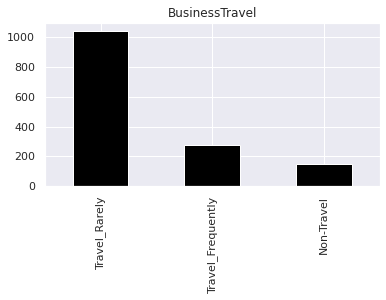

In [6]:
data['BusinessTravel'].value_counts().plot(kind='bar',title='BusinessTravel',color='black')

In [7]:
data['BusinessTravel'].groupby(data['Attrition']).describe()

,count,unique,top,freq
Attrition,,,,
No,1233,3,Travel_Rarely,887
Yes,237,3,Travel_Rarely,156


<p>We can see that this needs to be changed to a dummy variable.<br>
We also note that we have very few individuals in the non-travel category - this may negatively impact the model if we include this variable.<br>
We will drop this variable from our analysis.</p>

In [8]:
data = data.drop(columns=['BusinessTravel'])

__Department__

<AxesSubplot:title={'center':'BusinessTravel'}>

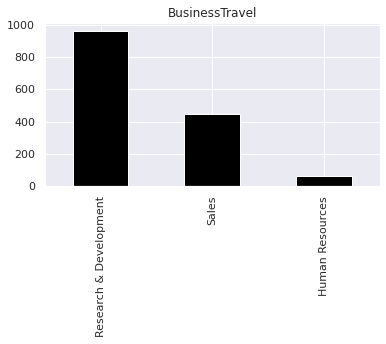

In [9]:
data['Department'].value_counts().plot(kind='bar',title='BusinessTravel',color='black')

There is a department with very few individuals, Human Resources. 
We will drop this variable from our analysis, as this can cause convergence issues for our model.

In [10]:
data = data.drop(columns=['Department'])

__EducationField__

<AxesSubplot:title={'center':'EducationField'}>

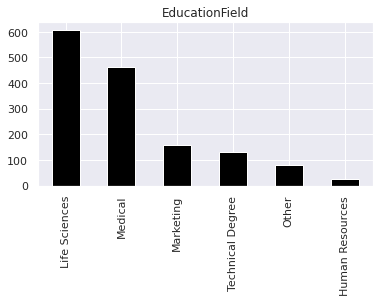

In [11]:
data['EducationField'].value_counts().plot(kind='bar',title='EducationField',color='black')

In [12]:
data['EducationField'].groupby(data['Attrition']).value_counts()

Attrition  EducationField  
No         Life Sciences       517
           Medical             401
           Marketing           124
           Technical Degree    100
           Other                71
           Human Resources      20
Yes        Life Sciences        89
           Medical              63
           Marketing            35
           Technical Degree     32
           Other                11
           Human Resources       7
Name: EducationField, dtype: int64

We can see that this variable has quite a few fields with very small sample sizes - this can cause convergence issues, so we will remove this data from our analysis.

In [13]:
data = data.drop(columns=['EducationField'])

__Gender__

<AxesSubplot:title={'center':'Gender'}>

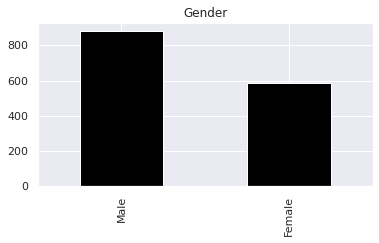

In [14]:
data['Gender'].value_counts().plot(kind='bar',title='Gender',color='black')

<p>We can see that this variable can be encoded as a Boolean variable, if we change it to encode one gender.<br>
Let's encode it as male, such that GenderMale = 1 when male, GenderMale = 0 when female.<br>
In doing so, we don't need to create a dummy variable for each gender.</p>

In [15]:
data = data.rename(columns={'Gender':'GenderMale'})
data['GenderMale'] = data['GenderMale'].replace('Male',1)
data['GenderMale'] = data['GenderMale'].replace('Female',0)

Let's see whether there's a difference between attrition outcome groups in their distribution amongst the Gender variable. 

<AxesSubplot:title={'center':'Attrition = No'}>

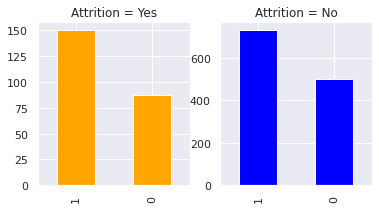

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data_attrit = data.loc[data['Attrition'] == 'Yes']
data_attrit['GenderMale'].value_counts().plot(kind='bar',title='Attrition = Yes',color='orange',ax=axes[0])
data_stay = data.loc[data['Attrition'] == 'No']
data_stay['GenderMale'].value_counts().plot(kind='bar',title='Attrition = No',color='blue',ax=axes[1])

In [17]:
data['GenderMale'].groupby(data['Attrition']).describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
No,1233.0,0.593674,0.491346,0.0,0.0,1.0,1.0,1.0
Yes,237.0,0.632911,0.483031,0.0,0.0,1.0,1.0,1.0


<p>We won't be able to perform robust statistical measures on this variable to understand whether there is a significant difference between these two groups in terms of their distribution in the Gender variable, but by inspection, we notice that there does appear to be a difference.<br>
Variables with higher overall variance are more likely to be stronger predictors, so this provides good evidence that it is worth investigating further.</p>

__JobRole__

<AxesSubplot:title={'center':'JobRole'}>

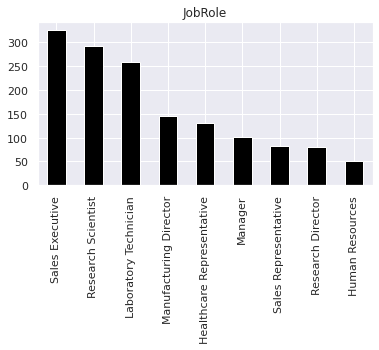

In [18]:
data['JobRole'].value_counts().plot(kind='bar',title='JobRole',color='black')

Once again, we can see that there are very few individuals in certain job roles - we will drop this variable from our analysis, as it can cause convergence issues when fitting the model. 

In [19]:
data = data.drop(columns=['JobRole'])

__MaritalStatus__

<AxesSubplot:title={'center':'MaritalStatus'}>

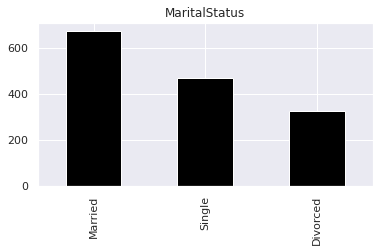

In [20]:
data['MaritalStatus'].value_counts().plot(kind='bar',title='MaritalStatus',color='black')

<AxesSubplot:title={'center':'Attrition = No'}>

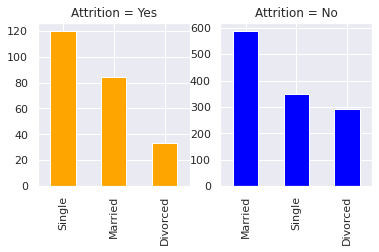

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data_attrit = data.loc[data['Attrition'] == 'Yes']
data_attrit['MaritalStatus'].value_counts().plot(kind='bar',title='Attrition = Yes',color='orange',ax=axes[0])
data_stay = data.loc[data['Attrition'] == 'No']
data_stay['MaritalStatus'].value_counts().plot(kind='bar',title='Attrition = No',color='blue',ax=axes[1])

<p>There is better distribution amongst these values than some of the other categorical variables we've investigated.<br> 
This variable will need to be encoded as a dummy variable.<br>
We will investigate later whether this is a good predictor in terms of collinearity and other measures.</p>

__Over18__

<AxesSubplot:title={'center':'Over18'}>

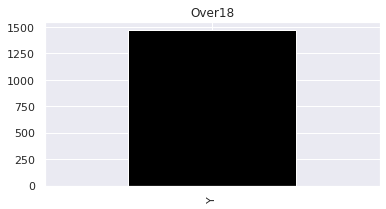

In [22]:
data['Over18'].value_counts().plot(kind='bar',title='Over18',color='black')

We can see that all of the samples have the same value for this predictor - let's drop it from the dataset, since it will not be helpful in our model. 

In [23]:
data = data.drop(['Over18'],axis=1)

__OverTime__

<AxesSubplot:title={'center':'OverTime'}>

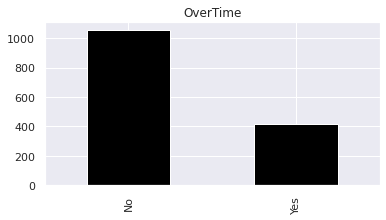

In [24]:
data['OverTime'].value_counts().plot(kind='bar',title='OverTime',color='black')

We can see that this variable can be encoded as a boolean variable.

In [25]:
data['OverTime'] = data['OverTime'].replace('Yes',1)
data['OverTime'] = data['OverTime'].replace('No',0)

<AxesSubplot:title={'center':'Attrition = No'}>

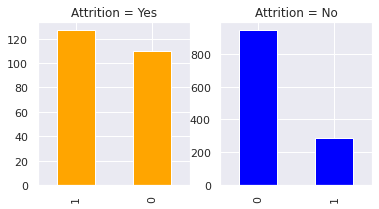

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data_attrit = data.loc[data['Attrition'] == 'Yes']
data_attrit['OverTime'].value_counts().plot(kind='bar',title='Attrition = Yes',color='orange',ax=axes[0])
data_stay = data.loc[data['Attrition'] == 'No']
data_stay['OverTime'].value_counts().plot(kind='bar',title='Attrition = No',color='blue',ax=axes[1])

<p>We can see by inspection that there appears to be a large difference in the distribution between these two groups.<br>
Because this is a categorical variable, we won't be able to do robust statistical tests to see whether the difference is signficant, but we can look at the means of the two groups and see whether they're different.</p>

In [27]:
data['OverTime'].groupby(data['Attrition']).describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
No,1233.0,0.234388,0.423787,0.0,0.0,0.0,0.0,1.0
Yes,237.0,0.535865,0.499768,0.0,0.0,1.0,1.0,1.0


__Attrition__

Finally, we want to encode our attrition variable numerically. 

<AxesSubplot:>

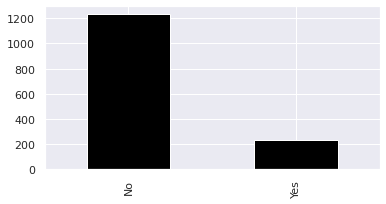

In [28]:
data['Attrition'].value_counts().plot(kind='bar',color='black')

In [29]:
data['Attrition'] = data['Attrition'].replace('Yes',1)
data['Attrition'] = data['Attrition'].replace('No',0)

__Dummy Variables__

Now that we've investigated all of our non-numerical variables, let's go ahead and create dummy variables for our dataset.

In [30]:
data = pd.get_dummies(data)
data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,GenderMale,HourlyRate,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,...,8,0,1,6,4,0,5,0,0,1
1,49,0,279,8,1,1,2,3,1,61,...,10,3,3,10,7,1,7,0,1,0
2,37,1,1373,2,2,1,4,4,1,92,...,7,3,3,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,0,56,...,8,3,3,8,7,3,0,0,1,0
4,27,0,591,2,1,1,7,1,1,40,...,6,3,3,2,2,2,2,0,1,0


Now we have 31 predictors and one outcome variable. 

Let's make sure all of our variables have the correct data type (numeric) so we can continue with our exploratory data analysis.

In [31]:
data.dtypes

Age                         int64
Attrition                   int64
DailyRate                   int64
DistanceFromHome            int64
Education                   int64
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
GenderMale                  int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
MaritalStatus_

<div style="background-color:rgba(0, 127, 245, 0.1); text-align:left; vertical-align:left; padding:5px 0;padding-left:5px;font-size:20px"> 
Exploratory Data Analysis
</div>
<div style="background-color:rgba(12, 12, 97, 0.05); text-align:left; vertical-align:left; padding:5px 0;padding-left:5px;font-size:16px;font-style:italic"> 
Case Control Sampling
</div>

Let's take the time to understand the potential underlying distribution of our predictors and response variable. 
This will yield important information about what models we should use to fit the data.

In addition, we will eliminate variables with low variance, low significance (based on our domain knowledge), and intercorrelated variables. 

#### Response Variable: Attrition

We want to encode our response variable numerically, so we can properly utilize the variable in our logistic regression modelling.
Usually we do so by encoding true instances as 1 and false instances as 0.

Once this is done, let's look at the distribution of the attrition response variable. 

<AxesSubplot:>

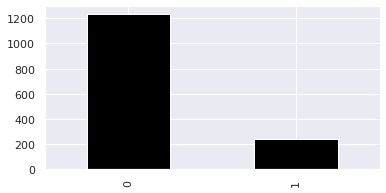

In [32]:
data['Attrition'].value_counts().plot(kind='bar',color='black')

We can see that there is a much smaller number of cases or samples where Attrition is true. 
This means that our data is relatively unbalanced, and may cause issues with our modeling.
Since we are going to leverage logistic regression, we will use case control sampling to address this imbalance.
At the moment, we are at about 1200:200. This is a 6:1 ratio. 
Let's leverage case control sampling to get only roughly 800:200, so that we can reduce the variance of our parameter estimates. 
A good rule of thumb is to aim for a ratio of 4:1 or 5:1, since there are diminishing returns variance reduction beyond that point.

<p> There are other methods that can be used to reduce an unbalanced dataset, such as oversampling methods like SMOTE, but they should only be done once we have completed our feature selection. Therefore, we will focus only on case control sampling here, and explore other methods later.</p>

#### Case Control Sampling

In [33]:
#data_attrit = data.loc[data['Attrition']==1]
#data_stay = data.loc[data['Attrition']==0]
#case_control = data_stay.sample(n=1000,replace=False)
#case_control = case_control.reset_index(drop=True)
#data = pd.concat([data_attrit, case_control], axis=0)
#data = data.reset_index(drop=True)

#attrition_counts = data['Attrition'].value_counts()
#print(attrition_counts)
#df = pd.DataFrame({'Attrition_Counts':['Stay','Attrition'], 'val':[1000,237]})
#ax = df.plot.bar(x='Attrition_Counts', y='val', rot=0,color='black')

<div style="background-color:rgba(0, 127, 245, 0.1); text-align:left; vertical-align:left; padding:5px 0;padding-left:5px;font-size:20px"> 
Exploratory Data Analysis
</div>
<div style="background-color:rgba(12, 12, 97, 0.05); text-align:left; vertical-align:left; padding:5px 0;padding-left:5px;font-size:16px;font-style:italic"> 
Numerical Predictors
</div>

<p>Let's look at the distribution of each of our variables, to see if any of them can be dropped from our analysis or if there is additional information we can learn about them.<br>
We will start with our numeric variables, and use histograms to understand their distributions.</p>

__Age__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: Age, dtype: object

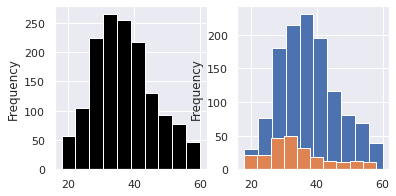

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['Age'].plot(ax=axes[0],kind='hist',color='black')
data['Age'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

In [35]:
data['Age'].groupby(data['Attrition']).describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
0,1233.0,37.561233,8.88836,18.0,31.0,36.0,43.0,60.0
1,237.0,33.607595,9.68935,18.0,28.0,32.0,39.0,58.0


In [36]:
attrit_age = data.query('Attrition == 1')['Age']
stay_age = data.query('Attrition == 0')['Age']
stats.levene(attrit_age, stay_age)

LeveneResult(statistic=0.48784929772776303, pvalue=0.4849988830829256)

We can see that the variance between the two groups is relatively equivalent.
Now we'll see whether there is a difference between the two groups in this variable. 
If there is a difference, we will consider including the variable in our analysis.

In [37]:
import scipy.stats as stats
stats.ttest_ind(attrit_age,stay_age,equal_var=True)

Ttest_indResult(statistic=-6.1786638353072165, pvalue=8.356308021103649e-10)

<p>We can see that the t-test results tell us that there is a significant difference between groups.<br> 
For our variables, we are using the studentized t-test, since we can't necessarily assume normality.<br>
    Although this variable appears to be normally distributed, for consistency, we will use the student t-test for all of our variables.<br>
This difference is visualized below:</p>

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

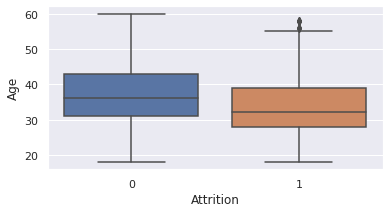

In [38]:
sn.boxplot(x='Attrition', y='Age', data=data)

We have sufficient evidence that Age is a good predictor to include in our modeling approach.

__DailyRate__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: DailyRate, dtype: object

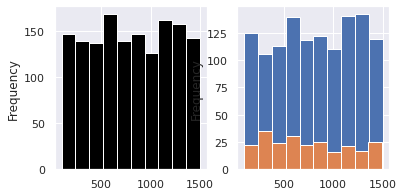

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['DailyRate'].plot(ax=axes[0],kind='hist',color='black')
data['DailyRate'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

In [40]:
data['DailyRate'].groupby(data['Attrition']).describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
0,1233.0,812.504461,403.208379,102.0,477.0,817.0,1176.0,1499.0
1,237.0,750.362869,401.899519,103.0,408.0,699.0,1092.0,1496.0


In [41]:
attrit_rate = data.query('Attrition == 1')['DailyRate']
stay_rate = data.query('Attrition == 0')['DailyRate']
stats.levene(attrit_rate, stay_rate)

LeveneResult(statistic=0.13703794064142177, pvalue=0.7112970406238526)

In [42]:
import scipy.stats as stats
stats.ttest_ind(attrit_rate,stay_rate,equal_var=True)

Ttest_indResult(statistic=-2.1740836777017747, pvalue=0.02985816066026497)

<AxesSubplot:xlabel='Attrition', ylabel='DailyRate'>

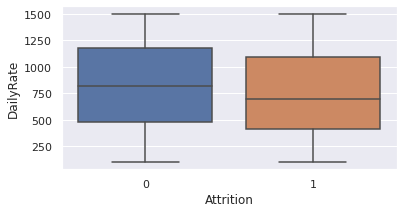

In [43]:
sn.boxplot(x='Attrition', y='DailyRate', data=data)

<p> Based on our analysis, we can tell that there is a statistically significant difference between groups. 
    This predictor might be better than others to include as a result.</p>

__DistanceFromHome__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: DistanceFromHome, dtype: object

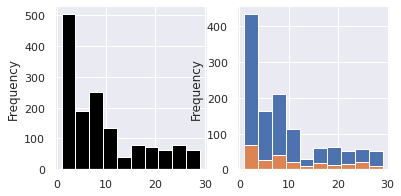

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['DistanceFromHome'].plot(ax=axes[0],kind='hist',color='black')
data['DistanceFromHome'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

In [45]:
data['DistanceFromHome'].groupby(data['Attrition']).describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
0,1233.0,8.915653,8.012633,1.0,2.0,7.0,13.0,29.0
1,237.0,10.632911,8.452525,1.0,3.0,9.0,17.0,29.0


In [46]:
attrit_dist = data.query('Attrition == 1')['DistanceFromHome']
stay_dist = data.query('Attrition == 0')['DistanceFromHome']
stats.levene(attrit_dist, stay_dist)

LeveneResult(statistic=3.9135257992111065, pvalue=0.04808570812266364)

This tells us that there is strong evidence that the variance is not homogenous between groups. 
We will need to run a different t-test to accurately understand whether the difference between groups is significant.
We will pass the 'equal_var' argument as False, since we have evidence that the variances are not equivalent between groups.

In [47]:
import scipy.stats as stats
stats.ttest_ind(attrit_dist,stay_dist,equal_var=False)

Ttest_indResult(statistic=2.888183062817627, pvalue=0.004136511971511406)

<AxesSubplot:xlabel='Attrition', ylabel='DistanceFromHome'>

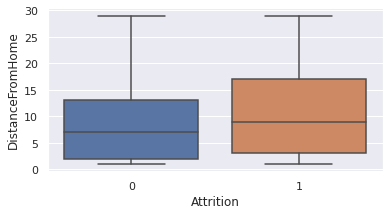

In [48]:
sn.boxplot(x='Attrition', y='DistanceFromHome', data=data)

The distribution is quite skewed. 
However, we have strong evidence that this might be a good predictor.

__Education__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: Education, dtype: object

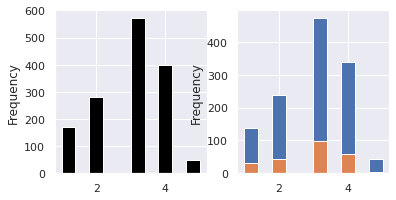

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['Education'].plot(ax=axes[0],kind='hist',color='black')
data['Education'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

<p>This variable actually encodes a categorical scale.<br> 
Education<br>
1 'Below College'<br>
2 'College'<br>
3 'Bachelor'<br>
4 'Master'<br>
5 'Doctor'</p>
<p>Let's create a variable to encode the highest degree level obtained, rather than using this scale.<br>
We will create the variable as follows:<br>
Education: No degree<br>
Education: undergrad<br>
Education: grad</p>
<p>It will align more closely with what this variable is attempting to encode. Additionally, because it is truly a categorical variable, we want to encode it correctly, so we don't experience issues later.</p>

<AxesSubplot:>

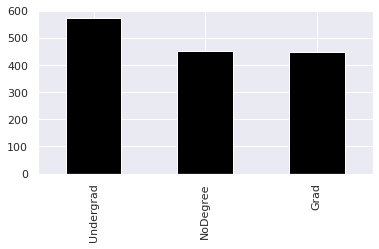

In [50]:
data['Education'] = data['Education'].replace(1,'NoDegree')
data['Education'] = data['Education'].replace(2,'NoDegree')
data['Education'] = data['Education'].replace(3,'Undergrad')
data['Education'] = data['Education'].replace(4,'Grad')
data['Education'] = data['Education'].replace(5,'Grad')

data['Education'].value_counts().plot(kind='bar',color='black')

We see that our samples are more evenly distributed amongst the possible values, and that the variable more accurately captures the measured attribute.

Let's see if there's a difference between our two groups. 

<AxesSubplot:title={'center':'Attrition = No'}>

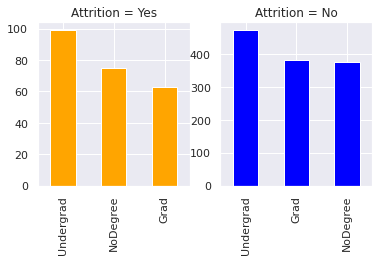

In [51]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data_attrit = data.loc[data['Attrition'] == 1]
data_attrit['Education'].value_counts().plot(kind='bar',title='Attrition = Yes',color='orange',ax=axes[0])
data_stay = data.loc[data['Attrition'] == 0]
data_stay['Education'].value_counts().plot(kind='bar',title='Attrition = No',color='blue',ax=axes[1])

We can see that there is a smaller proportion of individuals with a grad degree in attrition = yes than in attrition = no. 
Because this is a categorical variable, our best approach to study the variance in the predictor is by inspection. 

In [52]:
data = pd.get_dummies(data)

__EmployeeCount__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: EmployeeCount, dtype: object

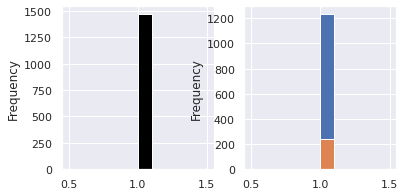

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['EmployeeCount'].plot(ax=axes[0],kind='hist',color='black')
data['EmployeeCount'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

We can see that each employee has the same value for this variable - we will drop this from our analysis.

In [54]:
data = data.drop(columns=['EmployeeCount'])

__EmployeeNumber__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: EmployeeNumber, dtype: object

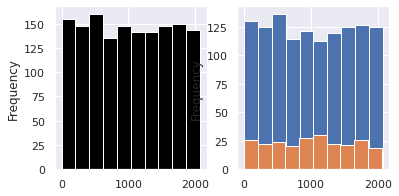

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['EmployeeNumber'].plot(ax=axes[0],kind='hist',color='black')
data['EmployeeNumber'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

The histogram actually hides the fact that each employee has a unique employee number. 
This is common in databases, and it was likely the primary key for the table. 

In [56]:
data['EmployeeNumber'].value_counts()

1       1
1391    1
1389    1
1387    1
1383    1
       ..
659     1
657     1
656     1
655     1
2068    1
Name: EmployeeNumber, Length: 1470, dtype: int64

We can remove this variable from our analysis.

In [57]:
data = data.drop(columns=['EmployeeNumber'])

__EnvironmentSatisfaction__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: EnvironmentSatisfaction, dtype: object

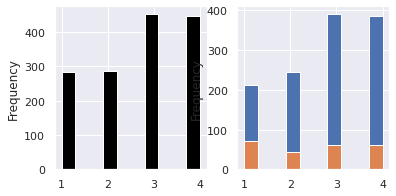

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['EnvironmentSatisfaction'].plot(ax=axes[0],kind='hist',color='black')
data['EnvironmentSatisfaction'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

<p>This is another variable that is truly a categorical variable.<br>
EnvironmentSatisfaction<br>
1 'Low'<br>
2 'Medium'<br>
3 'High'<br>
4 'Very High'</p>

<p>Let's create a boolean variable to encode this more effectively.<br> 
We will create two categories:<br>
1,2 - Less Satisfied<br>
3,4 - MoreVery Satisfied</p>

<AxesSubplot:title={'center':'EnvironmentSatisfaction'}>

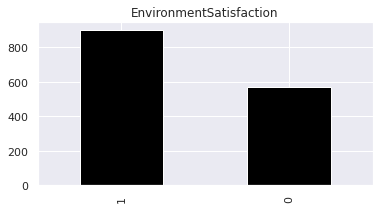

In [59]:
data['EnvironmentSatisfaction'] = data['EnvironmentSatisfaction'].replace(1,0)
data['EnvironmentSatisfaction'] = data['EnvironmentSatisfaction'].replace(2,0)
data['EnvironmentSatisfaction'] = data['EnvironmentSatisfaction'].replace(3,1)
data['EnvironmentSatisfaction'] = data['EnvironmentSatisfaction'].replace(4,1)

data['EnvironmentSatisfaction'].value_counts().plot(kind='bar',title='EnvironmentSatisfaction',color='black')

Let's investigate whether there's a difference between groups. 

<AxesSubplot:title={'center':'Attrition = No'}>

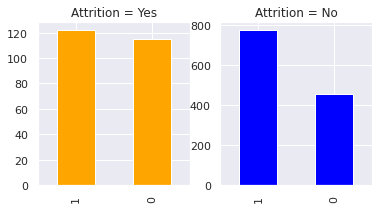

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data_attrit = data.loc[data['Attrition'] == 1]
data_attrit['EnvironmentSatisfaction'].value_counts().plot(kind='bar',title='Attrition = Yes',color='orange',ax=axes[0])
data_stay = data.loc[data['Attrition'] == 0]
data_stay['EnvironmentSatisfaction'].value_counts().plot(kind='bar',title='Attrition = No',color='blue',ax=axes[1])

In [61]:
data['EnvironmentSatisfaction'].groupby(data['Attrition']).describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
0,1233.0,0.630170,0.482954,0.0,0.0,1.0,1.0,1.0
1,237.0,0.514768,0.500840,0.0,0.0,1.0,1.0,1.0


We can clearly see by inspection that there is a large difference between groups. 
This provides compelling evidence that we would like to keep this variable in our analysis.

__HourlyRate__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: HourlyRate, dtype: object

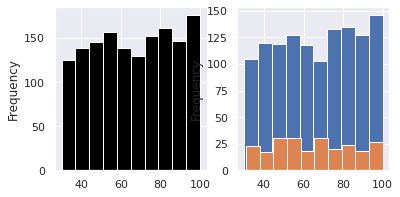

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['HourlyRate'].plot(ax=axes[0],kind='hist',color='black')
data['HourlyRate'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

In [63]:
data['HourlyRate'].groupby(data['Attrition']).describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
0,1233.0,65.952149,20.380754,30.0,48.0,66.0,83.0,100.0
1,237.0,65.573840,20.099958,31.0,50.0,66.0,84.0,100.0


In [64]:
attrit_rate = data.query('Attrition == 1')['HourlyRate']
stay_rate = data.query('Attrition == 0')['HourlyRate']
stats.levene(attrit_rate, stay_rate)

LeveneResult(statistic=0.4510511131556991, pvalue=0.501941889460197)

In [65]:
import scipy.stats as stats
stats.ttest_ind(attrit_rate,stay_rate,equal_var=True)

Ttest_indResult(statistic=-0.26228987349264493, pvalue=0.7931347689944243)

<AxesSubplot:xlabel='Attrition', ylabel='HourlyRate'>

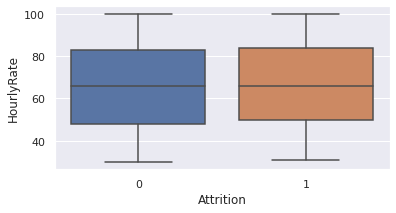

In [66]:
sn.boxplot(x='Attrition', y='HourlyRate', data=data)

There is not a significant difference between groups for this variable. 
This means that there is less variance for this predictor. 
Because we are interested in the predictors with the highest variance, we will exclude this variable from our analysis.

In [67]:
data = data.drop(columns=['HourlyRate'])

__JobInvolvement__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: JobInvolvement, dtype: object

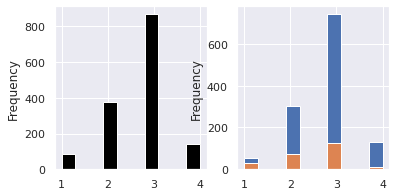

In [68]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['JobInvolvement'].plot(ax=axes[0],kind='hist',color='black')
data['JobInvolvement'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

<p>This is another variable that is truly a categorical variable.<br>
JobInvolvement<br>
1 'Low'<br>
2 'Medium'<br>
3 'High'<br>
4 'Very High'<br>
Lets create a categorical variable to encode this more effectively.<br> 
We will create two categories and encode as a boolean.<br>
1,2 - LessInvolved  (0)<br>
2,3 - MoreInvolved  (1)</p>


Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: JobInvolvement, dtype: object

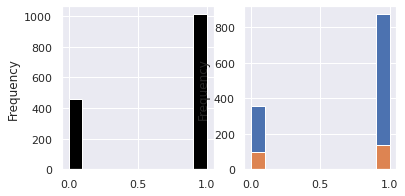

In [69]:
data['JobInvolvement'] = data['JobInvolvement'].replace(1,0)
data['JobInvolvement'] = data['JobInvolvement'].replace(2,0)
data['JobInvolvement'] = data['JobInvolvement'].replace(3,1)
data['JobInvolvement'] = data['JobInvolvement'].replace(4,1)

fig, axes = plt.subplots(nrows=1, ncols=2)
data['JobInvolvement'].plot(ax=axes[0],kind='hist',color='black')
data['JobInvolvement'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

__JobLevel__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: JobLevel, dtype: object

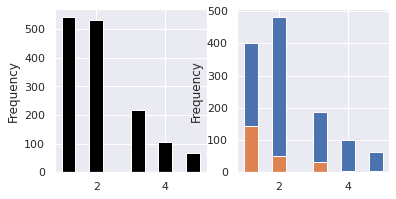

In [70]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['JobLevel'].plot(ax=axes[0],kind='hist',color='black')
data['JobLevel'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

<AxesSubplot:title={'center':'Attrition = No'}>

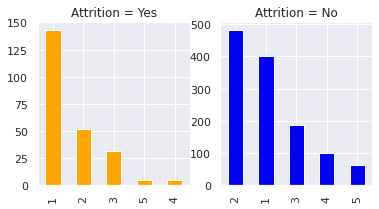

In [71]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data_attrit = data.loc[data['Attrition'] == 1]
data_attrit['JobLevel'].value_counts().plot(kind='bar',title='Attrition = Yes',color='orange',ax=axes[0])
data_stay = data.loc[data['Attrition'] == 0]
data_stay['JobLevel'].value_counts().plot(kind='bar',title='Attrition = No',color='blue',ax=axes[1])

<p>We can see that there are very few individuals with a job level above 3 in the Attrition group - this imbalance may cause issues later on.<br>
We may consider dropping this predictor from our analysis later on.</p>

__JobSatisfaction__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: JobSatisfaction, dtype: object

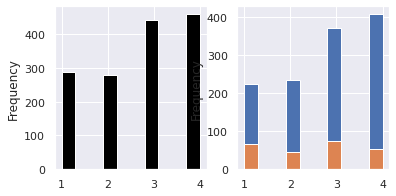

In [72]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['JobSatisfaction'].plot(ax=axes[0],kind='hist',color='black')
data['JobSatisfaction'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

<p>This is another categorical variable.<br>
    We notice that this variable is similar to another variable we've looked at - environment satisfaction.<br> 
    We might expect that this variable is correlated to environment satisfaction.<br>

JobSatisfaction<br>
1 'Low'<br>
2 'Medium'<br>
3 'High'<br>
4 'Very High'<br>

Let's change this variable to encode less satisfied vs. more satisfied.</p>

In [73]:
data['JobSatisfaction'] = data['JobSatisfaction'].replace(1,0)
data['JobSatisfaction'] = data['JobSatisfaction'].replace(2,0)
data['JobSatisfaction'] = data['JobSatisfaction'].replace(3,1)
data['JobSatisfaction'] = data['JobSatisfaction'].replace(4,1)

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: JobSatisfaction, dtype: object

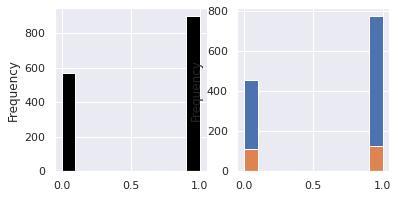

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['JobSatisfaction'].plot(ax=axes[0],kind='hist',color='black')
data['JobSatisfaction'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

In [75]:
data['JobSatisfaction'].groupby(data['Attrition']).describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
0,1233.0,0.629359,0.483172,0.0,0.0,1.0,1.0,1.0
1,237.0,0.527426,0.500304,0.0,0.0,1.0,1.0,1.0


<AxesSubplot:title={'center':'Attrition = No'}>

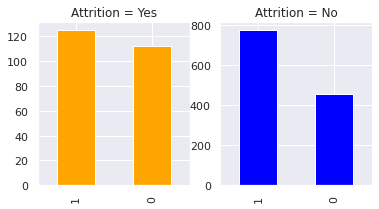

In [76]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data_attrit = data.loc[data['Attrition'] == 1]
data_attrit['JobSatisfaction'].value_counts().plot(kind='bar',title='Attrition = Yes',color='orange',ax=axes[0])
data_stay = data.loc[data['Attrition'] == 0]
data_stay['JobSatisfaction'].value_counts().plot(kind='bar',title='Attrition = No',color='blue',ax=axes[1])

We can see by inspection that there appears to be a difference between groups. 

__MonthlyRate__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: MonthlyRate, dtype: object

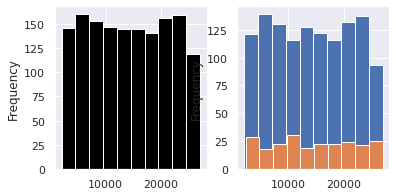

In [77]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['MonthlyRate'].plot(ax=axes[0],kind='hist',color='black')
data['MonthlyRate'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

In [78]:
data['MonthlyRate'].groupby(data['Attrition']).describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
0,1233.0,14265.779400,7102.260749,2094.0,7973.0,14120.0,20364.0,26997.0
1,237.0,14559.308017,7208.153264,2326.0,8870.0,14618.0,21081.0,26999.0


In [79]:
attrit_rate = data.query('Attrition == 1')['MonthlyRate']
stay_rate = data.query('Attrition == 0')['MonthlyRate']
stats.levene(attrit_rate, stay_rate)

LeveneResult(statistic=0.03150748458605897, pvalue=0.8591374218401133)

In [80]:
import scipy.stats as stats
stats.ttest_ind(attrit_rate,stay_rate,equal_var=True)

Ttest_indResult(statistic=0.5813058211545318, pvalue=0.5611235982243015)

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyRate'>

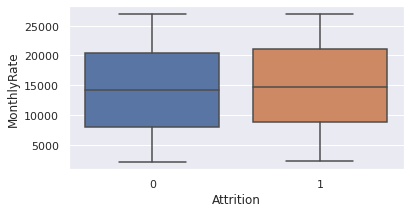

In [81]:
sn.boxplot(x='Attrition', y='MonthlyRate', data=data)

We see that there is not a significant difference between groups for this variable. 
We will drop this from our analysis, since we have other variables that encode income.

In [82]:
data = data.drop(columns=['MonthlyRate'])

__Monthly Income__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: MonthlyIncome, dtype: object

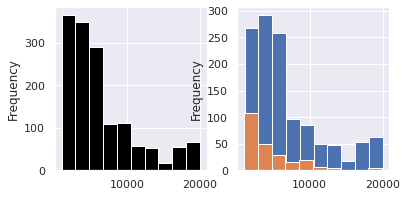

In [83]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['MonthlyIncome'].plot(ax=axes[0],kind='hist',color='black')
data['MonthlyIncome'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

In [84]:
data['MonthlyIncome'].groupby(data['Attrition']).describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
0,1233.0,6832.739659,4818.208001,1051.0,3211.0,5204.0,8834.0,19999.0
1,237.0,4787.092827,3640.210367,1009.0,2373.0,3202.0,5916.0,19859.0


In [85]:
attrit_rate = data.query('Attrition == 1')['MonthlyIncome']
stay_rate = data.query('Attrition == 0')['MonthlyIncome']
stats.levene(attrit_rate, stay_rate)

LeveneResult(statistic=14.899586974568717, pvalue=0.00011830973427184532)

In [86]:
import scipy.stats as stats
stats.ttest_ind(attrit_rate,stay_rate,equal_var=False)

Ttest_indResult(statistic=-7.482621586644742, pvalue=4.433588628286071e-13)

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

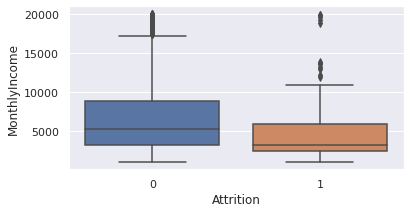

In [87]:
sn.boxplot(x='Attrition', y='MonthlyIncome', data=data)

We can see that there is a significant difference between groups for this variable. 
However, because this variable contains a significant number of outliers, as visualized in the boxplot, and because we already have a variable that encodes income, we will drop this variable from our analysis.

In [88]:
data = data.drop(columns=['MonthlyIncome'])

__Num Companies Worked__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: NumCompaniesWorked, dtype: object

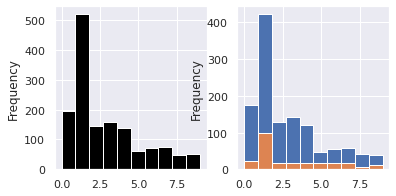

In [89]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['NumCompaniesWorked'].plot(ax=axes[0],kind='hist',color='black')
data['NumCompaniesWorked'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

In [90]:
data['NumCompaniesWorked'].groupby(data['Attrition']).describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
0,1233.0,2.645580,2.460090,0.0,1.0,2.0,4.0,9.0
1,237.0,2.940928,2.678519,0.0,1.0,1.0,5.0,9.0


In [91]:
attrit_rate = data.query('Attrition == 1')['NumCompaniesWorked']
stay_rate = data.query('Attrition == 0')['NumCompaniesWorked']
stats.levene(attrit_rate, stay_rate)

LeveneResult(statistic=3.301201485128789, pvalue=0.06943305877579965)

In [92]:
import scipy.stats as stats
stats.ttest_ind(attrit_rate,stay_rate,equal_var=False)

Ttest_indResult(statistic=1.574651071928319, pvalue=0.11633402601697647)

<AxesSubplot:xlabel='Attrition', ylabel='NumCompaniesWorked'>

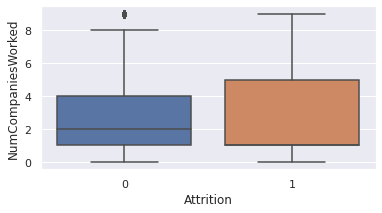

In [93]:
sn.boxplot(x='Attrition', y='NumCompaniesWorked', data=data)

We can see that there is not a statistically significant difference between groups.

__OverTime__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: OverTime, dtype: object

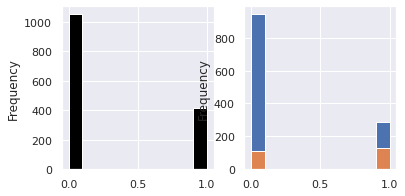

In [94]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['OverTime'].plot(ax=axes[0],kind='hist',color='black')
data['OverTime'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

In [95]:
data['OverTime'].groupby(data['Attrition']).describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
0,1233.0,0.234388,0.423787,0.0,0.0,0.0,0.0,1.0
1,237.0,0.535865,0.499768,0.0,0.0,1.0,1.0,1.0


<AxesSubplot:title={'center':'Attrition = No'}>

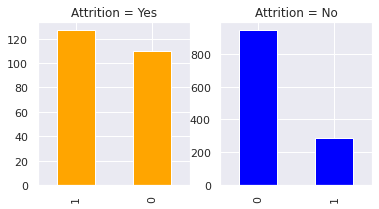

In [96]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data_attrit = data.loc[data['Attrition'] == 1]
data_attrit['OverTime'].value_counts().plot(kind='bar',title='Attrition = Yes',color='orange',ax=axes[0])
data_stay = data.loc[data['Attrition'] == 0]
data_stay['OverTime'].value_counts().plot(kind='bar',title='Attrition = No',color='blue',ax=axes[1])

We can see by inspection that there is a strong difference between groups.

__PercentSalaryHike__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: PercentSalaryHike, dtype: object

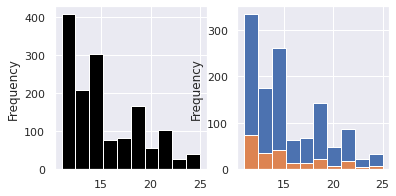

In [97]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['PercentSalaryHike'].plot(ax=axes[0],kind='hist',color='black')
data['PercentSalaryHike'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

In [98]:
data['PercentSalaryHike'].groupby(data['Attrition']).describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
0,1233.0,15.231144,3.639511,11.0,12.0,14.0,18.0,25.0
1,237.0,15.097046,3.770294,11.0,12.0,14.0,17.0,25.0


In [99]:
attrit_rate = data.query('Attrition == 1')['PercentSalaryHike']
stay_rate = data.query('Attrition == 0')['PercentSalaryHike']
stats.levene(attrit_rate, stay_rate)

LeveneResult(statistic=0.3448686107237524, pvalue=0.5571226657108874)

In [100]:
import scipy.stats as stats
stats.ttest_ind(attrit_rate,stay_rate,equal_var=True)

Ttest_indResult(statistic=-0.5164573250747643, pvalue=0.6056128238893757)

<AxesSubplot:xlabel='Attrition', ylabel='PercentSalaryHike'>

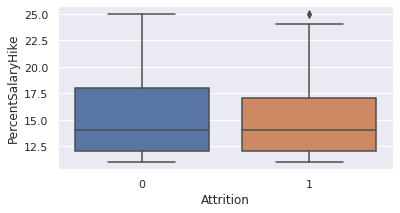

In [101]:
sn.boxplot(x='Attrition', y='PercentSalaryHike', data=data)

Because we already have a variable that encodes income, and because there is a skewed distribution that might cause issues with our model, we will drop this predictor from our analysis.

__PerformanceRating__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: PerformanceRating, dtype: object

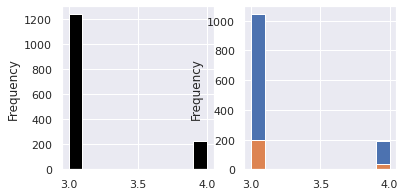

In [102]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['PerformanceRating'].plot(ax=axes[0],kind='hist',color='black')
data['PerformanceRating'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

<p>This is another categorical variable.<br>
We see that out of the total scale, we only have individuals with a high performance rating.<br> 
PerformanceRating<br>
1 'Low'<br>
2 'Good'<br>
3 'Excellent'<br>
4 'Outstanding'<br>
Because we do not have much variance in this predictor, and because we could interpret this predictor to mean high performers such that all members fall within the same value, we can eliminate this predictor from our analysis.</p>

In [103]:
data = data.drop(columns=['PerformanceRating'])

__RelationshipSatisfaction__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: RelationshipSatisfaction, dtype: object

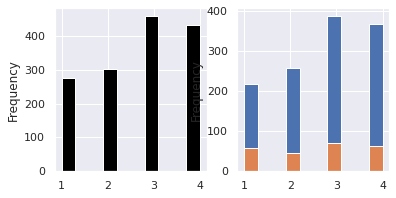

In [104]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['RelationshipSatisfaction'].plot(ax=axes[0],kind='hist',color='black')
data['RelationshipSatisfaction'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

<p>Once again, a categorical variable.<br> 
    RelationshipSatisfaction<br>
1 'Low'<br>
2 'Medium'<br>
3 'High'<br>
4 'Very High'<br>
Let's encode it as a boolean variable, to more accurately encode the predictor.<br>
1,2 - less satisfied<br>
3,4 - more satisfied<br>

In [105]:
data['RelationshipSatisfaction'] = data['RelationshipSatisfaction'].replace(1,0)
data['RelationshipSatisfaction'] = data['RelationshipSatisfaction'].replace(2,0)
data['RelationshipSatisfaction'] = data['RelationshipSatisfaction'].replace(3,1)
data['RelationshipSatisfaction'] = data['RelationshipSatisfaction'].replace(4,1)

<AxesSubplot:title={'center':'Attrition = No'}>

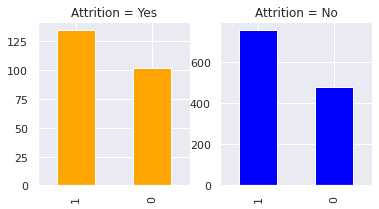

In [106]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data_attrit = data.loc[data['Attrition'] == 1]
data_attrit['RelationshipSatisfaction'].value_counts().plot(kind='bar',title='Attrition = Yes',color='orange',ax=axes[0])
data_stay = data.loc[data['Attrition'] == 0]
data_stay['RelationshipSatisfaction'].value_counts().plot(kind='bar',title='Attrition = No',color='blue',ax=axes[1])

In [107]:
data['RelationshipSatisfaction'].groupby(data['Attrition']).describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
0,1233.0,0.613139,0.487229,0.0,0.0,1.0,1.0,1.0
1,237.0,0.569620,0.496177,0.0,0.0,1.0,1.0,1.0


We will keep this variable for now, although we suspect, given our domain knowledge, it might be intercorrelated with other variables like marital status.

__StandardHours__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: StandardHours, dtype: object

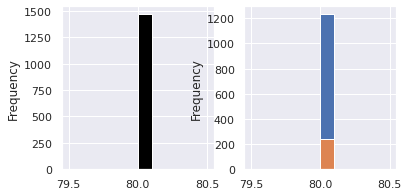

In [108]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['StandardHours'].plot(ax=axes[0],kind='hist',color='black')
data['StandardHours'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

We see that all observations have the same value for this predictor - we can drop this from our analysis.

In [109]:
data = data.drop(columns=['StandardHours'])

__Stock Option Level__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: StockOptionLevel, dtype: object

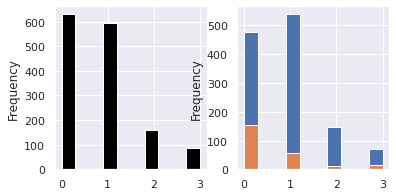

In [110]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['StockOptionLevel'].plot(ax=axes[0],kind='hist',color='black')
data['StockOptionLevel'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

We can see that we have a few levels for this variable that have very small sample sizes - this may cause convergence issues with our model, so we will drop this predictor from our analysis.

In [111]:
data = data.drop(columns=['StockOptionLevel'])

__TotalWorkingYears__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: TotalWorkingYears, dtype: object

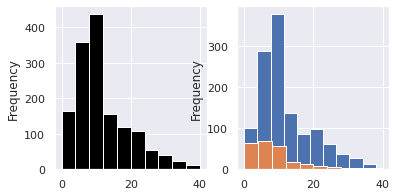

In [112]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['TotalWorkingYears'].plot(ax=axes[0],kind='hist',color='black')
data['TotalWorkingYears'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

In [113]:
data['TotalWorkingYears'].groupby(data['Attrition']).describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
0,1233.0,11.862936,7.760719,0.0,6.0,10.0,16.0,38.0
1,237.0,8.244726,7.169204,0.0,3.0,7.0,10.0,40.0


In [114]:
attrit_rate = data.query('Attrition == 1')['TotalWorkingYears']
stay_rate = data.query('Attrition == 0')['TotalWorkingYears']
stats.levene(attrit_rate, stay_rate)

LeveneResult(statistic=3.0623848089541714, pvalue=0.08033291448975143)

In [115]:
import scipy.stats as stats
stats.ttest_ind(attrit_rate,stay_rate,equal_var=True)

Ttest_indResult(statistic=-6.6522546135024445, pvalue=4.0618781112668525e-11)

<AxesSubplot:xlabel='Attrition', ylabel='TotalWorkingYears'>

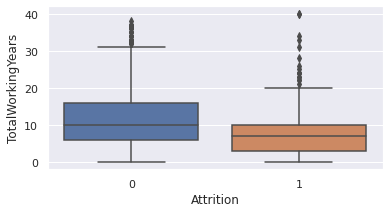

In [116]:
sn.boxplot(x='Attrition', y='TotalWorkingYears', data=data)

It appears that there are quite a few outliers that might be driving the difference in means - we will drop this predictor from our analysis, as this might cause convergence issues later.

In [117]:
data = data.drop(columns=['TotalWorkingYears'])

__TrainingTimesLastYear__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: TrainingTimesLastYear, dtype: object

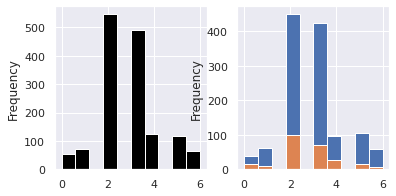

In [118]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['TrainingTimesLastYear'].plot(ax=axes[0],kind='hist',color='black')
data['TrainingTimesLastYear'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

Again, we see that there a few values that have very small sample sizes - because this is a discrete variable, this may impact our analysis, so we will drop this variable from our analysis.

In [119]:
data = data.drop(columns=['TrainingTimesLastYear'])

__WorkLifeBalance__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: WorkLifeBalance, dtype: object

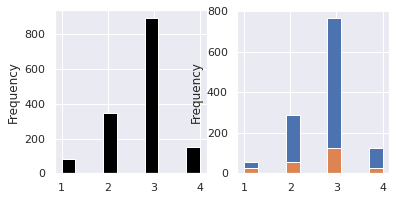

In [120]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['WorkLifeBalance'].plot(ax=axes[0],kind='hist',color='black')
data['WorkLifeBalance'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

<p>This is our final categorical variable.<br>
WorkLifeBalance<br>
1 'Bad'<br>
2 'Good'<br>
3 'Better'<br>
4 'Best'<br>
We can encode this as having less or more worklife balance to better capture the categorical nature of this variable.</p>

In [121]:
data['WorkLifeBalance'] = data['WorkLifeBalance'].replace(1,0)
data['WorkLifeBalance'] = data['WorkLifeBalance'].replace(2,0)
data['WorkLifeBalance'] = data['WorkLifeBalance'].replace(3,1)
data['WorkLifeBalance'] = data['WorkLifeBalance'].replace(4,1)

In [122]:
data['WorkLifeBalance'].groupby(data['Attrition']).describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
0,1233.0,0.723439,0.447479,0.0,0.0,1.0,1.0,1.0
1,237.0,0.649789,0.478045,0.0,0.0,1.0,1.0,1.0


<AxesSubplot:title={'center':'Attrition = No'}>

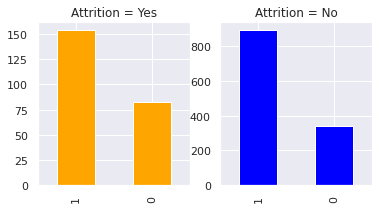

In [123]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data_attrit = data.loc[data['Attrition'] == 1]
data_attrit['WorkLifeBalance'].value_counts().plot(kind='bar',title='Attrition = Yes',color='orange',ax=axes[0])
data_stay = data.loc[data['Attrition'] == 0]
data_stay['WorkLifeBalance'].value_counts().plot(kind='bar',title='Attrition = No',color='blue',ax=axes[1])

By inspection, we notice that there might be a difference between the two groups.

__Years At Company__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: YearsAtCompany, dtype: object

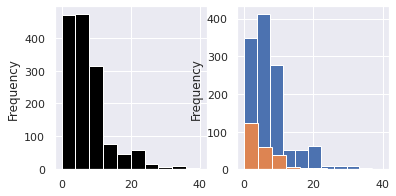

In [124]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['YearsAtCompany'].plot(ax=axes[0],kind='hist',color='black')
data['YearsAtCompany'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

In [125]:
data['YearsAtCompany'].groupby(data['Attrition']).describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
0,1233.0,7.369019,6.096298,0.0,3.0,6.0,10.0,37.0
1,237.0,5.130802,5.949984,0.0,1.0,3.0,7.0,40.0


In [126]:
attrit_rate = data.query('Attrition == 1')['YearsAtCompany']
stay_rate = data.query('Attrition == 0')['YearsAtCompany']
stats.levene(attrit_rate, stay_rate)

LeveneResult(statistic=2.7533975962582904, pvalue=0.09726160332756505)

In [127]:
import scipy.stats as stats
stats.ttest_ind(attrit_rate,stay_rate,equal_var=True)

Ttest_indResult(statistic=-5.1963086670254235, pvalue=2.3188716103863033e-07)

<AxesSubplot:xlabel='Attrition', ylabel='YearsAtCompany'>

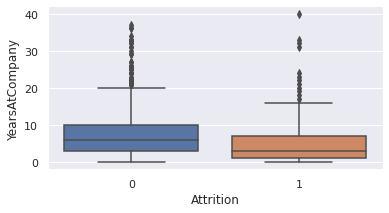

In [128]:
sn.boxplot(x='Attrition', y='YearsAtCompany', data=data)

This variable has a very skewed distribution - we may consider dropping this predictor from our analysis as a result.

__YearsInCurrentRole__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: YearsInCurrentRole, dtype: object

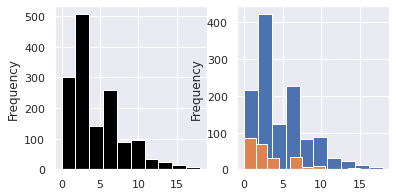

In [129]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['YearsInCurrentRole'].plot(ax=axes[0],kind='hist',color='black')
data['YearsInCurrentRole'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

In [130]:
data['YearsInCurrentRole'].groupby(data['Attrition']).describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
0,1233.0,4.484185,3.649402,0.0,2.0,3.0,7.0,18.0
1,237.0,2.902954,3.174827,0.0,0.0,2.0,4.0,15.0


In [131]:
attrit_rate = data.query('Attrition == 1')['YearsInCurrentRole']
stay_rate = data.query('Attrition == 0')['YearsInCurrentRole']
stats.levene(attrit_rate, stay_rate)

LeveneResult(statistic=16.023010657349747, pvalue=6.570169050687587e-05)

In [132]:
import scipy.stats as stats
stats.ttest_ind(attrit_rate,stay_rate,equal_var=False)

Ttest_indResult(statistic=-6.847079159882748, pvalue=3.1873903722051294e-11)

<AxesSubplot:xlabel='Attrition', ylabel='YearsInCurrentRole'>

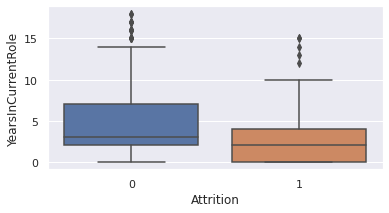

In [133]:
sn.boxplot(x='Attrition', y='YearsInCurrentRole', data=data)

This is also a highly skewed distribution, with a good number of outliers.

__YearsWithCurrManager__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: YearsWithCurrManager, dtype: object

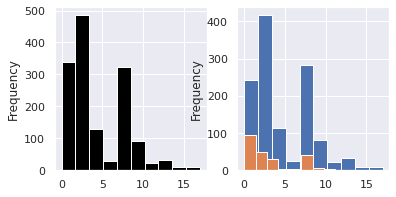

In [134]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['YearsWithCurrManager'].plot(ax=axes[0],kind='hist',color='black')
data['YearsWithCurrManager'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

In [135]:
data['YearsWithCurrManager'].groupby(data['Attrition']).describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
0,1233.0,4.367397,3.594116,0.0,2.0,3.0,7.0,17.0
1,237.0,2.852321,3.143349,0.0,0.0,2.0,5.0,14.0


In [136]:
attrit_rate = data.query('Attrition == 1')['YearsWithCurrManager']
stay_rate = data.query('Attrition == 0')['YearsWithCurrManager']
stats.levene(attrit_rate, stay_rate)

LeveneResult(statistic=9.66176551705255, pvalue=0.0019175509895717584)

In [137]:
import scipy.stats as stats
stats.ttest_ind(attrit_rate,stay_rate,equal_var=False)

Ttest_indResult(statistic=-6.6333988161585, pvalue=1.1850219000030649e-10)

<AxesSubplot:xlabel='Attrition', ylabel='YearsWithCurrManager'>

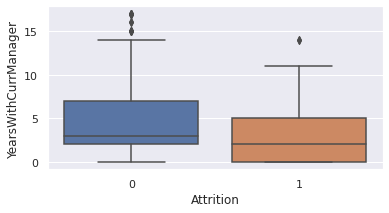

In [138]:
sn.boxplot(x='Attrition', y='YearsWithCurrManager', data=data)

There seems to be a difference between groups, but there are also a number of outliers. 
We will need to consider this as we continue selecting features.

__YearsSinceLastPromotion__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: YearsSinceLastPromotion, dtype: object

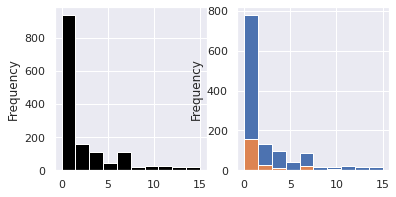

In [139]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['YearsSinceLastPromotion'].plot(ax=axes[0],kind='hist',color='black')
data['YearsSinceLastPromotion'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

In [140]:
data['YearsSinceLastPromotion'].groupby(data['Attrition']).describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
0,1233.0,2.234388,3.234762,0.0,0.0,1.0,3.0,15.0
1,237.0,1.945148,3.153077,0.0,0.0,1.0,2.0,15.0


In [141]:
attrit_rate = data.query('Attrition == 1')['YearsSinceLastPromotion']
stay_rate = data.query('Attrition == 0')['YearsSinceLastPromotion']
stats.levene(attrit_rate, stay_rate)

LeveneResult(statistic=0.39377468332250853, pvalue=0.5304195027928351)

In [142]:
import scipy.stats as stats
stats.ttest_ind(attrit_rate,stay_rate,equal_var=True)

Ttest_indResult(statistic=-1.2657876620135298, pvalue=0.2057899591624936)

<AxesSubplot:xlabel='Attrition', ylabel='YearsSinceLastPromotion'>

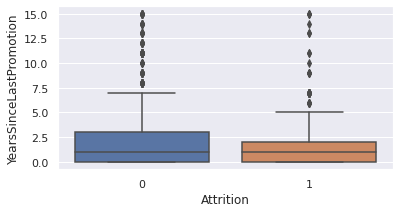

In [143]:
sn.boxplot(x='Attrition', y='YearsSinceLastPromotion', data=data)

This is an incredibly skewed distribution, with many outliers. 
We will drop this predictor from our dataset.

In [144]:
data = data.drop(columns=['YearsSinceLastPromotion'])

In [145]:
data2 = data

#### Summary

We have explored the distributions of our continuous numerical variables, and done some data cleaning and investigation, based on available domain knowledge. 
We notice that very few of our predictors likely have a normal distribution within each class, so therefore, we can rule out classification methods like linear discriminant analysis. 
We also notice that there is not obvious separation between the classes within each predictor - this suggests that logistic regression is a stable approach.

Now that we have prepared all of our variables, we need to investigate collinearity, and remove strongly correlated predictors.

#### Collinearity

Predictors that are highly collinear need to be dropped from our analysis. 
We can either combine predictors, create new predictors, or drop highly correlated factors from our analysis.

In [146]:
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

Our first approach will be to leverage a heatmap, so we can see highly correlated features easily.

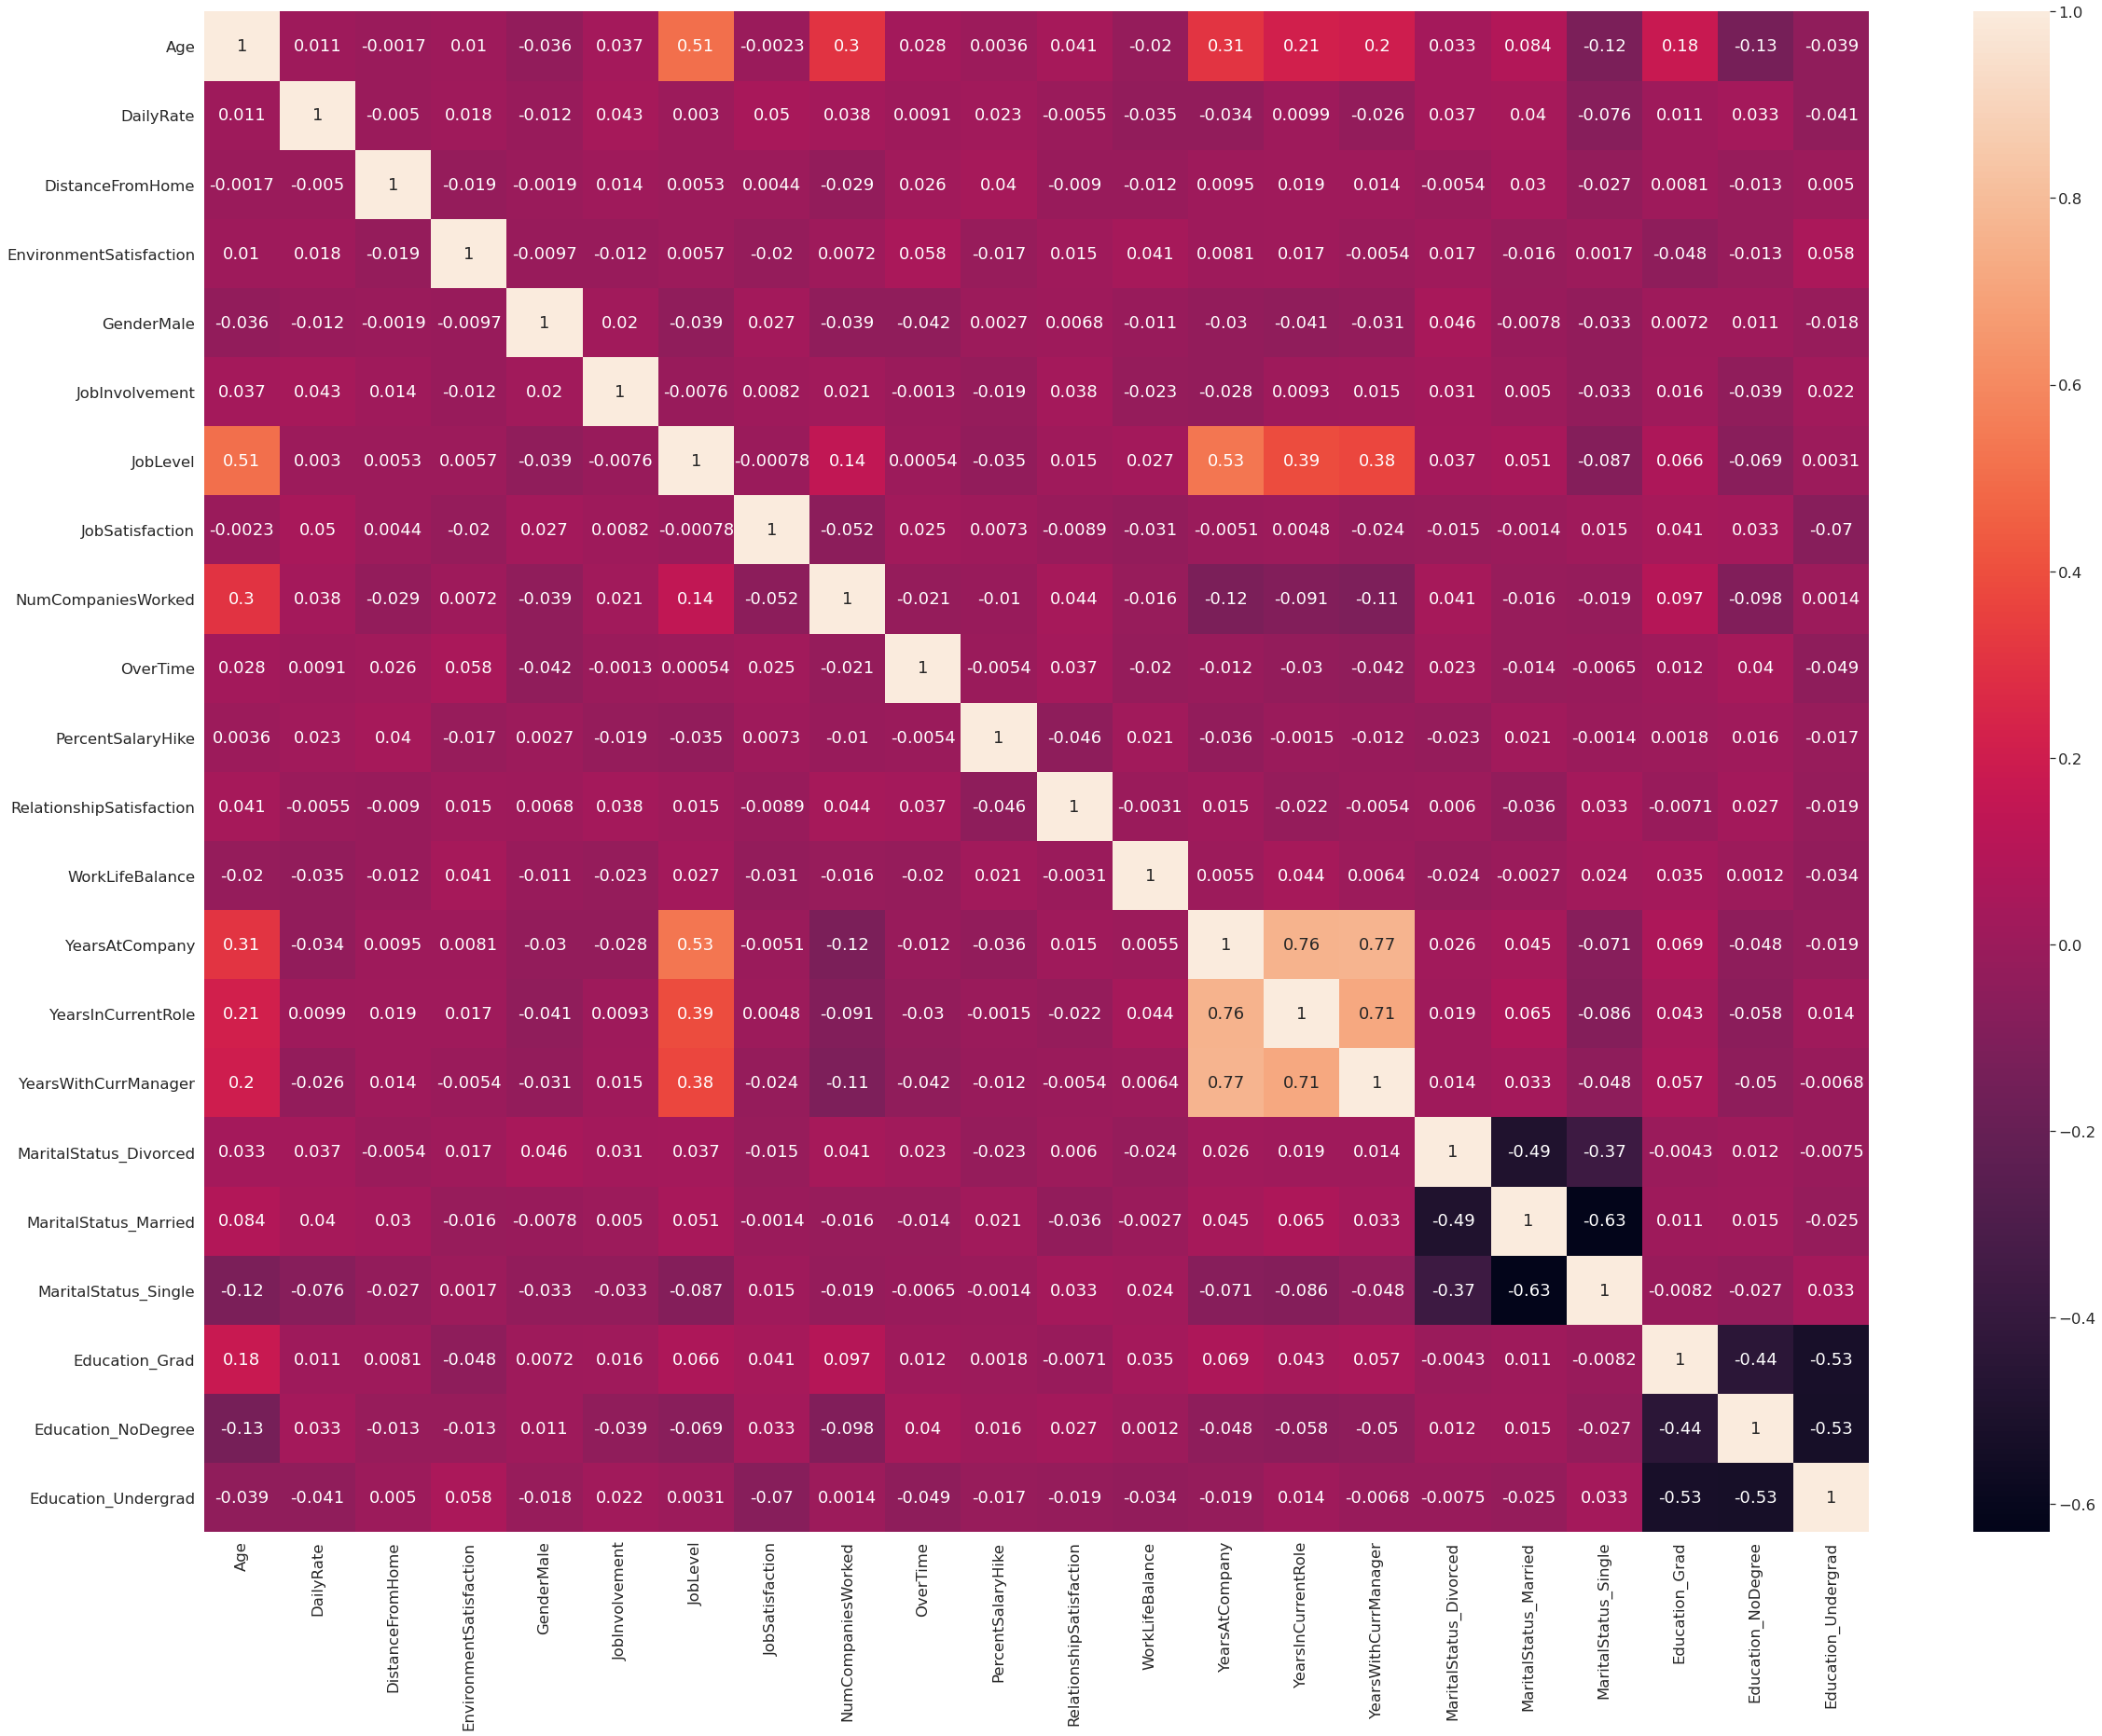

In [147]:
data_corr = data.drop(['Attrition'],axis=1)
corrMatrix = data_corr.corr()
sn.set(rc={'figure.figsize':(40,30)})
sn.set(font_scale=1.5)
sn.heatmap(corrMatrix, annot=True)
plt.show()

The cut-off for 'strongly correlated' is usually a score of 0.70 or above. 
We notice that there are a few moderately correlated features (0.50 or above), but we will not remove them from our predictor set now.
Let's remove our strongly correlated features from our predictor set.

In [148]:
data = data.drop(columns=['YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager'])


Another approach to reducing collinearity and unwanted variance is to use a variance inflation factor calculation, or VIF score, to evaluate factors that contribute the most to model variance.

In [149]:
data_corr = data.drop(['Attrition'],axis=1)
vif = pd.DataFrame()
vif["features"] = data_corr.columns
vif["vif_Factor"] = [variance_inflation_factor(data_corr.values, i) for i in range(data_corr.shape[1])]
vif

,features,vif_Factor
0,Age,1.511601
1,DailyRate,1.015848
2,DistanceFromHome,1.005338
3,EnvironmentSatisfaction,1.011806
4,GenderMale,1.009569
5,JobInvolvement,1.009735
6,JobLevel,1.361918
7,JobSatisfaction,1.013570
8,NumCompaniesWorked,1.115367
9,OverTime,1.013752


We will eliminate variables with a VIF score greater than 10. 

VIF scores of INF indicate perfect collinearity - we will need to eliminate further variables in order to resolve this issue.

In [150]:
data = data.drop(columns=['Education_Grad','Education_NoDegree','Education_Undergrad','MaritalStatus_Divorced','MaritalStatus_Married','MaritalStatus_Single'])

In [151]:
data_corr = data.drop(['Attrition'],axis=1)
vif = pd.DataFrame()
vif["features"] = data_corr.columns
vif["vif_Factor"] = [variance_inflation_factor(data_corr.values, i) for i in range(data_corr.shape[1])]
vif

,features,vif_Factor
0,Age,19.783245
1,DailyRate,4.676489
2,DistanceFromHome,2.249682
3,EnvironmentSatisfaction,2.517029
4,GenderMale,2.422625
5,JobInvolvement,3.124185
6,JobLevel,6.085303
7,JobSatisfaction,2.534030
8,NumCompaniesWorked,2.397062
9,OverTime,1.403532


As we've removed variables, we can see that there's additional variables that have poor VIF scores now. Let's eliminate those.

In [152]:
data = data.drop(columns=['Age','PercentSalaryHike'])

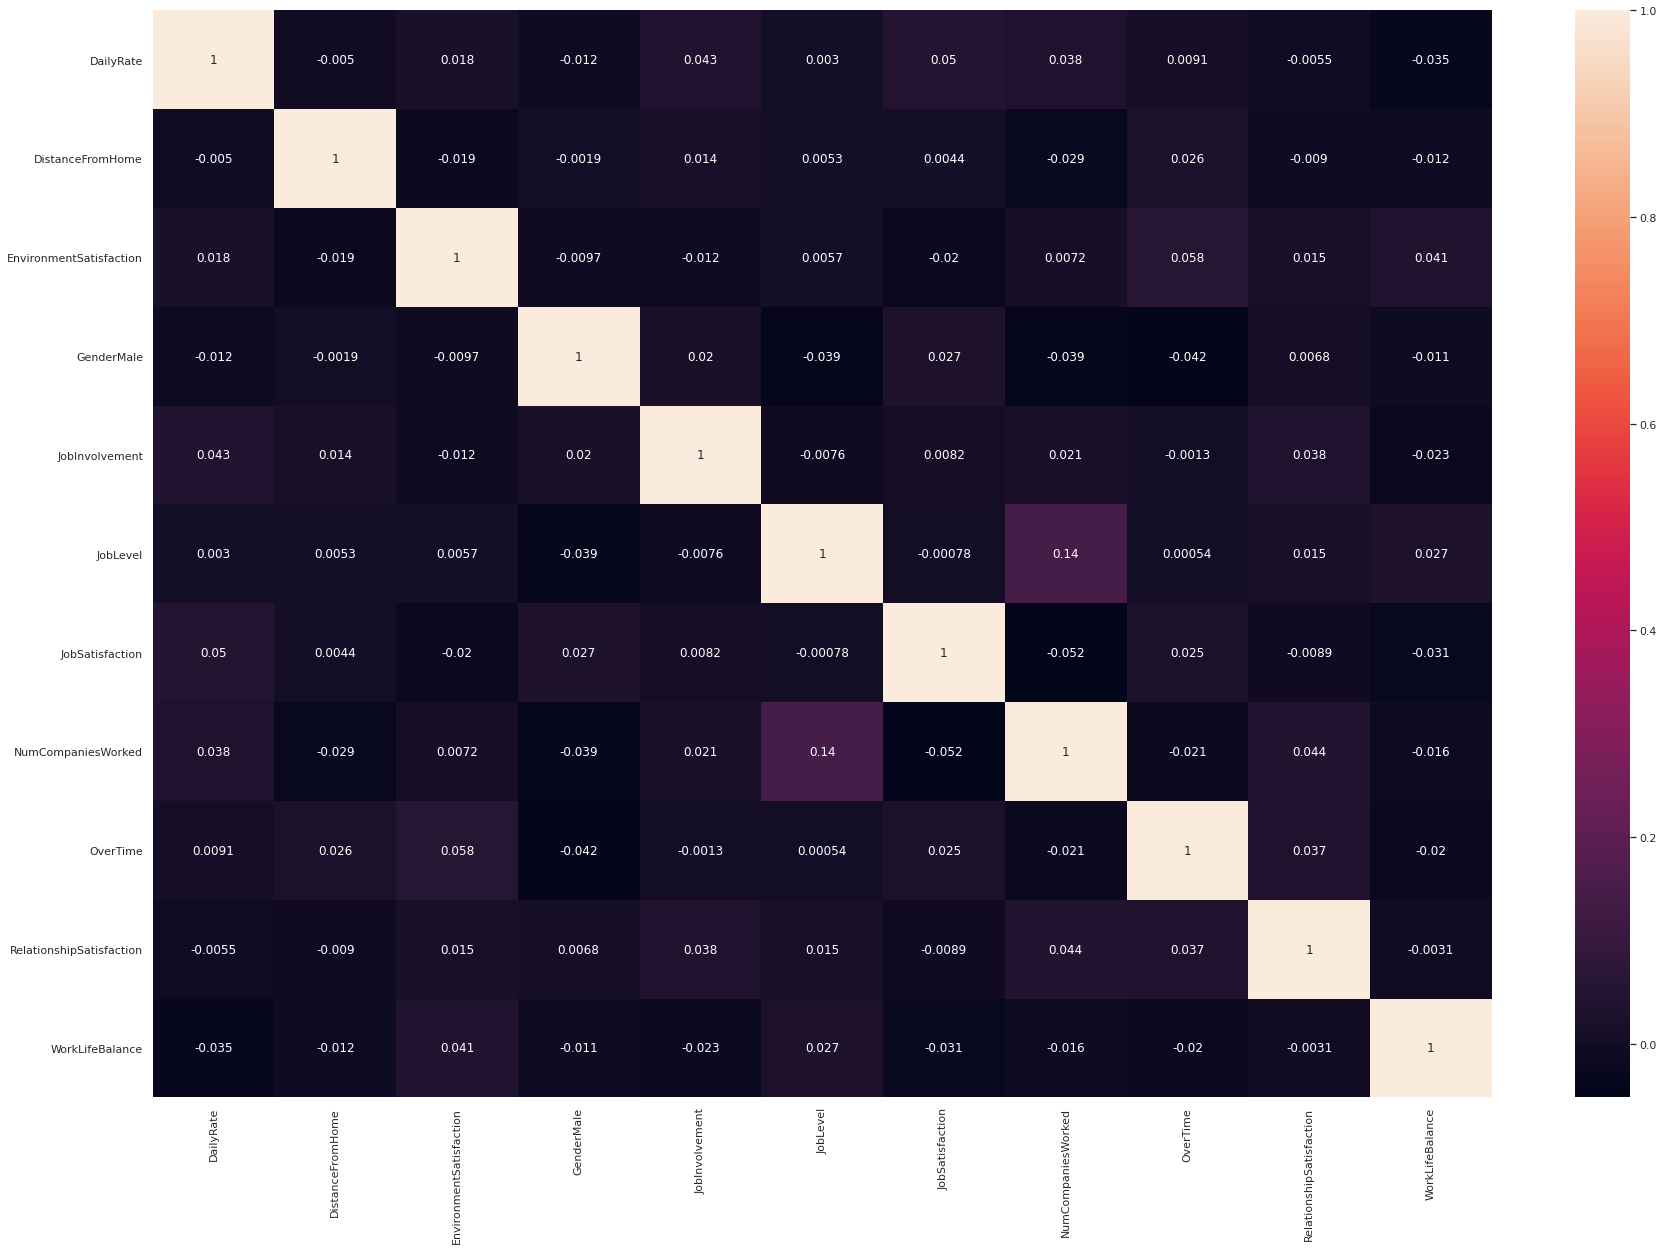

In [153]:
data_corr = data.drop(['Attrition'],axis=1)
corrMatrix = data_corr.corr()
sn.set(rc={'figure.figsize':(30,20)})
sn.set(font_scale=1)
sn.heatmap(corrMatrix, annot=True)
plt.show()

We can see clearly now that we have reduced collinearity significantly within our predictors. 

In [154]:
data_corr = data.drop(['Attrition'],axis=1)
vif = pd.DataFrame()
vif["features"] = data_corr.columns
vif["vif_Factor"] = [variance_inflation_factor(data_corr.values, i) for i in range(data_corr.shape[1])]
vif

,features,vif_Factor
0,DailyRate,4.161205
1,DistanceFromHome,2.143422
2,EnvironmentSatisfaction,2.427644
3,GenderMale,2.305405
4,JobInvolvement,2.947651
5,JobLevel,3.956010
6,JobSatisfaction,2.420726
7,NumCompaniesWorked,2.153264
8,OverTime,1.387235
9,RelationshipSatisfaction,2.403458


Now that we've eliminated variables that contribute to collinearity, we are ready to start selecting variables and fitting a model.

<div style="background-color:rgba(0, 127, 245, 0.1); text-align:left; vertical-align:left; padding:5px 0;padding-left:5px;font-size:20px"> 
Feature Selection & Modeling
</div>
<div style="background-color:rgba(12, 12, 97, 0.05); text-align:left; vertical-align:left; padding:5px 0;padding-left:5px;font-size:16px;font-style:italic"> 
Logistic Regression Model
</div>

Principle Component Analysis is an approach that can help us reduce dimensionality, and help us understand what proportion of the variance we are capturing.

Let's start by creating a logistic regression model, to see whether we're able to create a working model given the predictors we curently have, or if there are only a few significant factors we should include in our final model.

In [155]:
y = data['Attrition']
x = data.drop('Attrition',axis=1)
print('Available Features',x.columns)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, shuffle=True, random_state=2)

Available Features Index(['DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'GenderMale', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'NumCompaniesWorked', 'OverTime', 'RelationshipSatisfaction',
       'WorkLifeBalance'],
      dtype='object')


In [156]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter = 2500)
clf.fit(x_train,y_train)
clf.fit(x_train,y_train)
print('Coefficients and Intercept Value',clf.coef_,clf.intercept_)
y_pred = clf.predict(x_test)
y_true = y_test

Coefficients and Intercept Value [[-4.86883193e-04  3.12415667e-02 -6.59671371e-01  3.47610215e-01
  -6.84516221e-01 -5.21127560e-01 -5.15016658e-01  8.49435641e-02
   1.50266044e+00 -1.86046123e-01 -4.18659682e-01]] [-0.11419202]


These are the coefficients and intercept for our model. 
Unfortunately, we are not able to retrieve any information from our model about the p-values or statistical significance of any of our coefficients or the intercept.
However, we can use this information to discuss the relevance of some of our features to the outcome. 
We might use the coefficients to understand how a one unit change in the predictor impacts the log-likelihood. 
For example, our first predictor is DailyRate. We can say that in this model, a one unit change in DailyRate corresponds to a decrease in the log likelihood of attrition by 0.0004. 
Is this enough for us to come to our business leaders and share the relationship between these variables and our outcome? 
Unfortunately no, as we do not know the statistical significance of any of these features, and whether there are additional interaction effects that we'd like to consider or other contraints. 

In order to get some information about our coefficients and features, let's use a statsmodels implementation of the logistic regression model, to see if we can get any additional information.

In [157]:
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools import add_constant
x_train2 = add_constant(x_train)
print(Logit(y_train, x_train2).fit().summary())

Optimization terminated successfully.
         Current function value: 0.368265
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1164
Method:                           MLE   Df Model:                           11
Date:                Mon, 02 May 2022   Pseudo R-squ.:                  0.1647
Time:                        18:51:24   Log-Likelihood:                -433.08
converged:                       True   LL-Null:                       -518.44
Covariance Type:            nonrobust   LLR p-value:                 8.362e-31
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0219      0.387      0.057      0.955      -0.737

We can see here that our model does not take into account interaction effects, and does not match the model created by our other method. 
This is to be expected, as we're using different methods.
If we investigate the p-values, we notice that there are a few significant factors. 
DailyRate,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked and OverTime are significant. 
Let's rebuild the model, only including these factors.

In [158]:
x_train2 = add_constant(x_train)
x_train2 = x_train2.drop(columns=['GenderMale','RelationshipSatisfaction','WorkLifeBalance'])
model = Logit(y_train, x_train2).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.372889
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1167
Method:                           MLE   Df Model:                            8
Date:                Mon, 02 May 2022   Pseudo R-squ.:                  0.1542
Time:                        18:51:28   Log-Likelihood:                -438.52
converged:                       True   LL-Null:                       -518.44
Covariance Type:            nonrobust   LLR p-value:                 1.719e-30
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.2038      0.327     -0.623      0.533      -0.845   

<p>We see that our coefficients remained significant, but no improvement in our intercept.<br>
    The confidence interval contains 0, which tells us that when x = 0, the log odds of having attrition as an outcome are likely 0.<br> 
The two models are performing similarly, which means that perhaps we can drop the other variables from our analysis.</p>

<p>However, it could also mean that there are interaction effects we are missing. Our sklearn model does more to incorporate polynomial and interaction effects.<br>
Let's see how our sklearn model performed, so we know if we're able to build a logistic regression model that performs sufficiently well.<br>
If we are not able to build a logistic regression model that performs sufficiently well, then perhaps we are using the wrong model, which might suggest that the decision boundary is very non-linear and flexible.</p>

Training accuracy:
0.86
Test accuracy:
0.85


Text(3.5, 0.5, 'True')

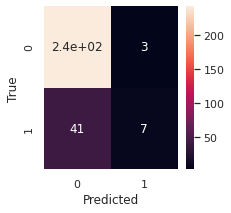

In [159]:
import numpy as np
from sklearn.metrics import accuracy_score
print("Training accuracy:")
print(np.round(accuracy_score(y_train,clf.predict(x_train)),2))
print("Test accuracy:")
print(np.round(accuracy_score(y_true,y_pred),2))

from sklearn.metrics import confusion_matrix
sn.set(rc={'figure.figsize':(3,3)})
sn.set(font_scale=1)
matrix = confusion_matrix(y_true,y_pred)
sn.heatmap(matrix,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')

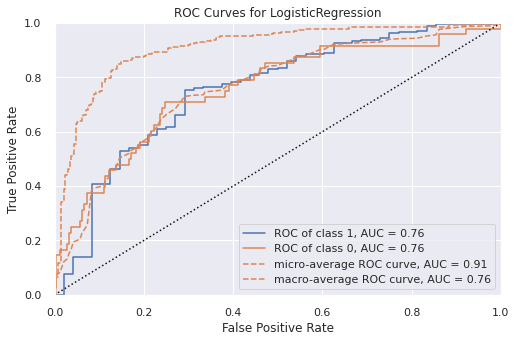

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [160]:
from yellowbrick.classifier import ROCAUC
sn.set(rc={'figure.figsize':(8,5)})
visualizer = ROCAUC(clf,classes=[1,0])
visualizer.fit(x_train.values, y_train)
visualizer.score(x_test, y_test) 
visualizer.show() 

When looking at our ROC curve, we want to investigate our micro-average ROC value, since we have unbalanced class sizes. This gives us a great ROC score for our model.

<p>So we're clearly able to create a (relatively) accurate model using a logistic regression approach that incorporates all of our current predictors.<br>
We can see that we have a relatively low false positive rate, but a relatively higher false negative rate.<br>
Let's see if principle component analysis can help us reduce the dimensionality, and potentially improve our model's performance.</p>

<div style="background-color:rgba(12, 12, 97, 0.05); text-align:left; vertical-align:left; padding:5px 0;padding-left:5px;font-size:16px;font-style:italic"> 
Principal Component Analysis
</div>

In [161]:
from sklearn.preprocessing import StandardScaler

y = data['Attrition']
x = data.drop('Attrition',axis=1)

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [162]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
pca.fit(x)

PCA()

In [163]:
print('Variance Explained - %')
print(pca.explained_variance_ratio_ * 100)

Variance Explained - %
[10.81905112 10.11529244  9.84157375  9.41441669  9.2943261   8.97426177
  8.93572742  8.66026532  8.35614929  8.0661466   7.52278951]


Text(0, 0.5, 'explained variance')

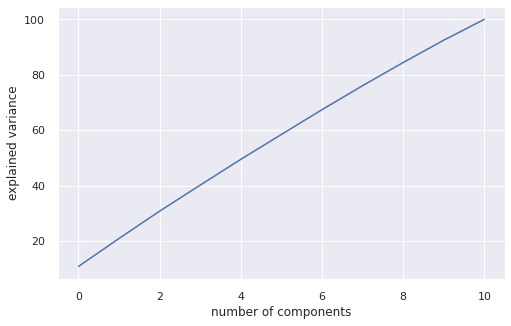

In [164]:
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel('number of components')
plt.ylabel('explained variance')

We can see that we likely need all of our included predictors in order to explain enough of the variance.
Unfortunately, with this approach, we can't retrieve p-values or other statistical measures to identify significance of any of these features. 
What this approach can tell us is whether dimension reduction should be explored (meaning that there are unneeded variables that we can drop from our analysis), as well as whether a logistic regression model (or other linear model) can be used to model our data.
Because we are getting relatively good accuracy with our model, we have sufficient evidence that we can build a relatively good classifier just with a logistic regression model.
Additionally, because each of our features seems to explain a relatively equal amount of variance (which is visualized by the linear plot above), we would not want to explore dimension reduction. This makes any simple logistic regression model difficult to fit manually, particularly with interaction effects, because we have so many features. 
It also rules out some non-parametric methods like K-Nearest Neighbors, which suffer from the curse of dimensionality. 
This is not necessarily surprising, given that we're working with a simulated dataset. Unfortunately, this means we are constrained to fitting models with most (if not all) of our current predictors, with none of them particularly more important than another.

We can see that we need all of our predictors that we curently have in order to explain a large proportion of the variance.
For example, we could look at our original dataset, and see the difference in the shape of the curve.

In [165]:
y = data2['Attrition']
x = data2.drop('Attrition',axis=1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, shuffle=True, random_state=2)

In [166]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter = 2500)
clf.fit(x_train,y_train)
print(clf.coef_,clf.intercept_)
y_pred = clf.predict(x_test)
y_true = y_test

[[-4.01931431e-02 -3.87113694e-04  3.69115417e-02 -6.91870722e-01
   3.90152196e-01 -6.12167694e-01 -3.46976445e-01 -6.28506388e-01
   1.19136262e-01  1.62643921e+00 -1.59687368e-02 -2.83262485e-01
  -5.17870791e-01  7.94042672e-02 -1.00768865e-01 -9.67570081e-02
  -3.60854674e-01  1.03640760e-02  9.91690466e-01  2.83111536e-01
   1.27603698e-01  2.30484634e-01]] [0.74751367]


Training accuracy:
0.86
Test accuracy:
0.86


Text(0.0, 0.5, 'True')

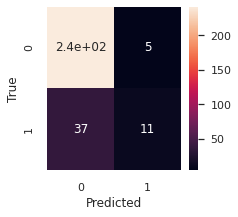

In [167]:
import numpy as np
from sklearn.metrics import accuracy_score
print("Training accuracy:")
print(np.round(accuracy_score(y_train,clf.predict(x_train)),2))
print("Test accuracy:")
print(np.round(accuracy_score(y_true,y_pred),2))
from sklearn.metrics import confusion_matrix
sn.set(rc={'figure.figsize':(3,3)})
sn.set(font_scale=1)
matrix = confusion_matrix(y_true,y_pred)
sn.heatmap(matrix,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')

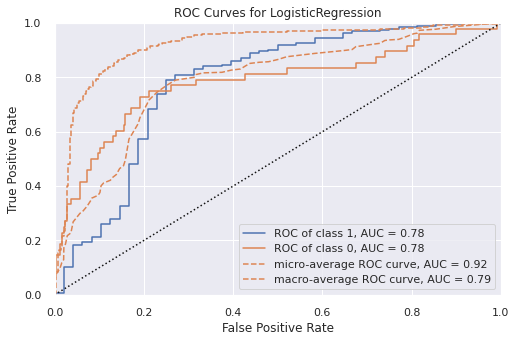

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [168]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(clf,classes=[1,0])
sn.set(rc={'figure.figsize':(8,5)})
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test) 
visualizer.show()    

We can see that we're getting a relatively similar result when using all of our original variables. 
So we were clearly able to reduce dimensionality successfully, reducing from over 30 predictors to 11.

In [169]:
from sklearn.preprocessing import StandardScaler
y = data_full['Attrition']
x = data_full.drop('Attrition',axis=1)
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [170]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
pca.fit(x)

PCA()

In [171]:
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
train = np.random.choice(data.index,200)
train_data = data.loc[pd.Index(train)]
test = np.random.choice(data.index,200)
test_data = data.loc[pd.Index(train)]

In [172]:
print('Variance Explained - %')
print(pca.explained_variance_ratio_ * 100)

Variance Explained - %
[1.04948948e+01 6.87358414e+00 5.17043810e+00 4.22547271e+00
 4.12216131e+00 3.92193761e+00 3.83255414e+00 3.54533801e+00
 3.48951017e+00 3.16112386e+00 2.95863529e+00 2.60466287e+00
 2.49698104e+00 2.39279674e+00 2.30537900e+00 2.25217367e+00
 2.24221930e+00 2.19956459e+00 2.14417305e+00 2.07928353e+00
 1.99293944e+00 1.98635845e+00 1.96447115e+00 1.90451280e+00
 1.88158548e+00 1.84621729e+00 1.81914228e+00 1.78006107e+00
 1.71610976e+00 1.68043870e+00 1.54641017e+00 1.34643969e+00
 1.13435417e+00 9.94155254e-01 9.41399841e-01 6.99525497e-01
 5.44454514e-01 4.43135267e-01 4.29131066e-01 2.91281317e-01
 2.17835738e-01 1.58099378e-01 1.01184067e-01 6.78737353e-02
 2.06975304e-30 6.43525977e-31 3.32774468e-31 3.10047628e-31
 2.26411319e-31 1.88038381e-31 6.84064085e-32]


Text(0, 0.5, 'Explained Variance')

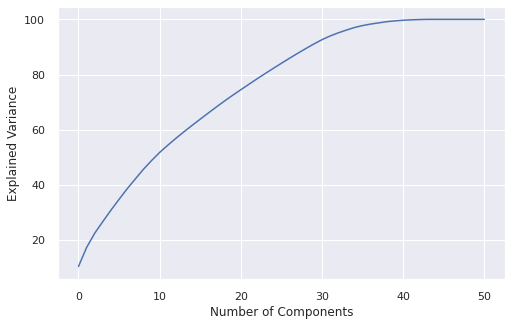

In [173]:
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')

We can see that we're getting relatively similar accuracy, but that the amount of variance we're able to explain tapers off past around 30 variables. 
So it makes sense why our current predictor set of 11 variables is capturing a good amount of the variance. This is in part because we reduced collinearity manually above, so we would expect to have less variables explaining the overall variance.

We could try to use methods to reduce the dimensionality by combining variables. This will unfortunately make it difficult for us to use the model to infer something about the relationship between our variables and the outcome of attrition. 
Therefore, we will use another approach to building our model below.

<div style="background-color:rgba(12, 12, 97, 0.05); text-align:left; vertical-align:left; padding:5px 0;padding-left:5px;font-size:16px;font-style:italic"> 
    Recursive Feature Elimination - RFE
</div>

We can use a different method altogether for feature selection - recursive feature elimination. 
Let's use our original cleaned dataset to see whether this algorithm selects the same features that we did during our EDA.

In [174]:
from sklearn.feature_selection import RFE
x = data_full.drop(columns=['Attrition'])
y = data_full['Attrition']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2)
model = LogisticRegression()
rfe = RFE(model)
fit = rfe.fit(train_x,train_y)

In [175]:
Columns = x.columns
RFE_support = rfe.support_
RFE_ranking = rfe.ranking_
dataset = pd.DataFrame({'Columns': Columns, 'RFE_support': RFE_support, 'RFE_ranking': RFE_ranking}, columns=['Columns', 'RFE_support', 'RFE_ranking'])
df = dataset[(dataset["RFE_support"] == True) & (dataset["RFE_ranking"] == 1)]
filtered_features = df['Columns']
filtered_features

4               EnvironmentSatisfaction
6                        JobInvolvement
8                       JobSatisfaction
14             RelationshipSatisfaction
18                      WorkLifeBalance
20                   YearsInCurrentRole
21              YearsSinceLastPromotion
23            BusinessTravel_Non-Travel
24     BusinessTravel_Travel_Frequently
28                     Department_Sales
29       EducationField_Human Resources
31             EducationField_Marketing
34      EducationField_Technical Degree
36                          Gender_Male
37    JobRole_Healthcare Representative
38              JobRole_Human Resources
39        JobRole_Laboratory Technician
40                      JobRole_Manager
41       JobRole_Manufacturing Director
42            JobRole_Research Director
45         JobRole_Sales Representative
46               MaritalStatus_Divorced
48                 MaritalStatus_Single
49                          OverTime_No
50                         OverTime_Yes


In [176]:
new_train_x = train_x[filtered_features]
new_test_x = test_x[filtered_features]

In [177]:
model = sm.Logit(train_y, new_train_x)
model_fit = model.fit()
print(model_fit.summary())

Optimization terminated successfully.
         Current function value: 0.314056
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1151
Method:                           MLE   Df Model:                           24
Date:                Mon, 02 May 2022   Pseudo R-squ.:                  0.2921
Time:                        19:04:19   Log-Likelihood:                -369.33
converged:                       True   LL-Null:                       -521.74
Covariance Type:            nonrobust   LLR p-value:                 1.799e-50
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
EnvironmentSatisfaction              -0.3905      0.089     -4

In [179]:
new_train_x = new_train_x.drop(columns=['Department_Sales','EducationField_Human Resources','EducationField_Marketing','Gender_Male','JobRole_Human Resources','JobRole_Manufacturing Director','MaritalStatus_Divorced'])
new_test_x = new_test_x.drop(columns=['Department_Sales','EducationField_Human Resources','EducationField_Marketing','Gender_Male','JobRole_Human Resources','JobRole_Manufacturing Director','MaritalStatus_Divorced'])

In [180]:
model = sm.Logit(train_y, new_train_x)
model_fit = model.fit()
print(model_fit.summary())

Optimization terminated successfully.
         Current function value: 0.321315
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1158
Method:                           MLE   Df Model:                           17
Date:                Mon, 02 May 2022   Pseudo R-squ.:                  0.2758
Time:                        19:06:27   Log-Likelihood:                -377.87
converged:                       True   LL-Null:                       -521.74
Covariance Type:            nonrobust   LLR p-value:                 3.793e-51
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
EnvironmentSatisfaction              -0.4056      0.088     -4

In [181]:
clf = LogisticRegression(max_iter = 2500)
clf.fit(new_train_x,train_y)
print(clf.coef_,clf.intercept_)
y_pred = clf.predict(new_test_x)
y_true = y_test

[[-0.37799814 -0.52190707 -0.33300225 -0.23104623 -0.2776444  -0.18154015
   0.15807202 -0.80117949  0.72176     0.5489453  -0.84133525  0.65732744
  -1.14311752 -1.52064435  1.25242588  1.02664293 -0.85224491  0.85307594]] [2.87162145]


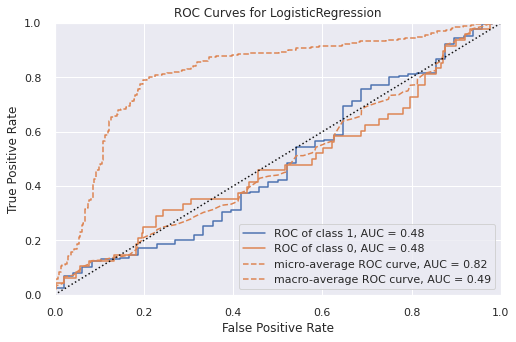

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [182]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(clf,classes=[1,0])
sn.set(rc={'figure.figsize':(8,5)})
visualizer.fit(new_train_x, train_y)
visualizer.score(new_test_x, y_test) 
visualizer.show() 

<div style="background-color:rgba(12, 12, 97, 0.05); text-align:left; vertical-align:left; padding:5px 0;padding-left:5px;font-size:16px;font-style:italic"> 
    Oversampling: SMOTE
</div>

In [183]:
from imblearn.over_sampling import SMOTE
columns_x =columns_x = new_train_x.columns
sm = SMOTE(random_state=0)
trainX_smote ,trainY_smote = sm.fit_resample(new_train_x, train_y)

train_x_smote = pd.DataFrame(data=trainX_smote,columns=columns_x)
train_y_smote = pd.DataFrame(data=trainY_smote,columns=['Attrition'])

In [184]:
trainX_final = trainX_smote
testX_final = new_test_x
trainY_final = trainY_smote
testY_final = test_y

logreg = LogisticRegression()
logreg.fit(trainX_final, trainY_final)

y_pred = logreg.predict(testX_final)

Text(0.0, 0.5, 'True')

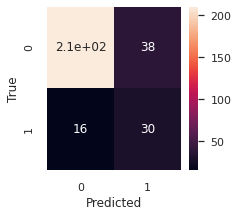

In [185]:
sn.set(rc={'figure.figsize':(3,3)})
sn.set(font_scale=1)
matrix = confusion_matrix(testY_final,y_pred)
sn.heatmap(matrix,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')

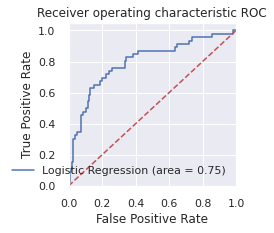

In [186]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(testY_final, logreg.predict(testX_final))
fpr, tpr, thresholds = roc_curve(testY_final, logreg.predict_proba(testX_final)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ROC')
plt.legend(loc="lower right")

plt.show()

Although we used a redundant factor elimination method, we are seeing worse performance. 
This is likely because, as we saw in our principle component analysis, we have many variables that contribute to the variance.

In [187]:
y = data2['Attrition']
x = data2.drop('Attrition',axis=1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, shuffle=True, random_state=2)

In [195]:
from imblearn.over_sampling import SMOTE
columns_x = x_train.columns
sm = SMOTE(random_state=0)
trainX_smote ,trainY_smote = sm.fit_resample(x_train, y_train)

train_x_smote = pd.DataFrame(data=trainX_smote,columns=columns_x)
train_y_smote = pd.DataFrame(data=trainY_smote,columns=['Attrition'])

In [196]:
trainX_final = train_x_smote
testX_final = x_test
trainY_final = train_y_smote
testY_final = y_test

logreg = LogisticRegression()
logreg.fit(trainX_final, trainY_final)

y_pred = logreg.predict(testX_final)

Text(0.0, 0.5, 'True')

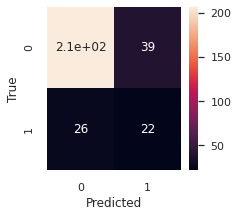

In [197]:
sn.set(rc={'figure.figsize':(3,3)})
sn.set(font_scale=1)
matrix = confusion_matrix(testY_final,y_pred)
sn.heatmap(matrix,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')

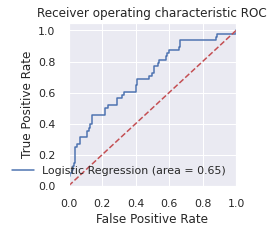

In [198]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(testY_final, logreg.predict(testX_final))
fpr, tpr, thresholds = roc_curve(testY_final, logreg.predict_proba(testX_final)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ROC')
plt.legend(loc="lower right")

plt.show()

<div style="background-color:rgba(12, 12, 97, 0.05); text-align:left; vertical-align:left; padding:5px 0;padding-left:5px;font-size:16px;font-style:italic"> 
    Forward Stepwise Refinement
</div>

We've seen with our principal component analysis that we're able to, with relative accuracy, use a logistic regression model with our current predictor set to predict attrition. 

We could explore more flexible models, but because the intent is for business leaders to understand attrition, and make decisions based on the outcomes, we will stick to simpler approaches, so that the models are easier to interpret and make sense of.

Unfortunately, it appears that we need all of the variables in our current predictor set to capture enough of the outcome variance. 
If we're unable to leverage a few variables to create a logistic regression model, we can explore creating new features, although this will reduce the interpretability of the model.

Because we want to determine the variables that are most strongly predictive of attrition, we will use forward stepwise refinement to identify how many variables we should add to maximize our log-likelihood score.

In [200]:
allowed_factors = data.columns.values.tolist()
allowed_factors = allowed_factors[1:]
print("Allowed Factors: ",allowed_factors)

Allowed Factors:  ['DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction', 'GenderMale', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'OverTime', 'RelationshipSatisfaction', 'WorkLifeBalance']


In [201]:
#First step: create training data

import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm

train = np.random.choice(data.index,200)
train_data = data.loc[pd.Index(train)]

test = np.random.choice(data.index,200)
test_data = data.loc[pd.Index(train)]

In [202]:
#Second step: start creating the model

#p = 1
model_1 = smf.logit(formula='Attrition~DistanceFromHome',data=train_data).fit(maxiter=35,disp=0)
max_val = model_1.llf
best_item = 'DistanceFromHome'

for item in allowed_factors:
    string = 'Attrition~'
    string = string + item
    #print(item)
    model_1 = smf.logit(formula=string,data=train_data).fit(maxiter=100,disp=0)
    val = model_1.llf
    #print(val)
    if val > max_val:
        max_val = val
        best_item = item 

str_1 = 'Attrition~' + best_item 
model_fin = smf.logit(formula=str_1,data=train_data).fit(maxiter=35,disp=0)
val1 = model_fin.llf
print(best_item, ': ', val1)
    

OverTime :  -81.09156293453952


In [203]:
model_fin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 May 2022   Pseudo R-squ.:                 0.07781
Time:                        19:18:07   Log-Likelihood:                -81.092
converged:                       True   LL-Null:                       -87.934
Covariance Type:            nonrobust   LLR p-value:                 0.0002162
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.2285      0.281     -7.923      0.000      -2.780      -1.677
OverTime       1.4813      0.401      3.692      0.000       0.695       2.268
==============================================================================
"""

We see that Environment Satisfaction was chosen as the best model with one predictor.
Let's try with two variables and see whether we can improve our model.

In [205]:
#p = 2
allowed_factors.remove(best_item)
str_add = 'Attrition~' + best_item + '+' + allowed_factors[0]
model_2 = smf.logit(formula=str_add,data=train_data).fit(maxiter=35,disp=0)
max_val2 = model_2.llf
best_item_2 = allowed_factors[0]
for item in allowed_factors:
    string = 'Attrition~' + best_item
    string = string + '+' + item
    #print(item)
    model_2 = smf.logit(formula=string,data=train_data).fit(maxiter=100,disp=0)
    val = model_2.llf
    #print(val)
    if val > max_val2:
        max_val2 = val
        best_item_2 = item 
str_2 = str_1 + '+' + best_item_2 
model_fin_2 = smf.logit(formula=str_2,data=train_data).fit(maxiter=35,disp=0)
val2 = model_fin_2.llf
print(best_item_2, ': ', val2)

DailyRate :  -72.58671233493145


In [206]:
model_fin_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  200
Model:                          Logit   Df Residuals:                      197
Method:                           MLE   Df Model:                            2
Date:                Mon, 02 May 2022   Pseudo R-squ.:                  0.1745
Time:                        19:18:15   Log-Likelihood:                -72.587
converged:                       True   LL-Null:                       -87.934
Covariance Type:            nonrobust   LLR p-value:                 2.162e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7776      0.425     -1.828      0.067      -1.611       0.056
OverTime       1.9329      0.458      4.223      0.000       1.036       2.830
DailyRate     -0.0023      0.001     -3.755      0.000      -0.003      -0.001
==============================================================================
"""

In [207]:
#p = 3
allowed_factors.remove(best_item_2)
str_add = 'Attrition~' + best_item + '+' + best_item_2 + '+' + allowed_factors[0] 
model_3 = smf.logit(formula=str_add,data=train_data).fit(maxiter=35,disp=0)
max_val3 = model_3.llf
best_item_3 = allowed_factors[0]
for item in allowed_factors:
    string = 'Attrition~' + best_item + '+' + best_item_2 + '+'+ item
    #print(item)
    model_3 = smf.logit(formula=string,data=train_data).fit(maxiter=100,disp=0)
    val = model_3.llf
    #print(val)
    if val > max_val3:
        max_val3 = val
        best_item_3 = item 
str_3 = str_2 + '+' + best_item_3 
model_fin_3 = smf.logit(formula=str_3,data=train_data).fit(maxiter=35,disp=0)
val3 = model_fin_3.llf
print(best_item_3, ': ', val3)

JobLevel :  -66.7562314127436


In [208]:
model_fin_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  200
Model:                          Logit   Df Residuals:                      196
Method:                           MLE   Df Model:                            3
Date:                Mon, 02 May 2022   Pseudo R-squ.:                  0.2408
Time:                        19:18:16   Log-Likelihood:                -66.756
converged:                       True   LL-Null:                       -87.934
Covariance Type:            nonrobust   LLR p-value:                 3.372e-09
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8394      0.679      1.235      0.217      -0.492       2.171
OverTime       2.0472      0.484      4.230      0.000       1.099       2.996
DailyRate     -0.0024      0.001     -3.676      0.000      -0.004      -0.001
JobLevel      -0.8849      0.297     -2.984      0.003      -1.466      -0.304
==============================================================================
"""

In [209]:
#p = 4
allowed_factors.remove(best_item_3)
str_add = 'Attrition~' + best_item + '+' + best_item_2 + '+' + best_item_3 + '+' + allowed_factors[0]
model_4 = smf.logit(formula=str_add,data=train_data).fit(maxiter=35,disp=0)
max_val4 = model_4.llf
best_item_4 = allowed_factors[0]
for item in allowed_factors:
    string = 'Attrition~' + best_item + '+' + best_item_2 + '+' + best_item_3 + '+' + item
    #print(item)
    model_4 = smf.logit(formula=string,data=train_data).fit(maxiter=100,disp=0)
    val = model_4.llf
    #print(val)
    if val > max_val4:
        max_val4 = val
        best_item_4 = item 
str_4 = str_3 + '+' + best_item_4
model_fin_4 = smf.logit(formula=str_4,data=train_data).fit(maxiter=35,disp=0)
val4 = model_fin_4.llf
print(best_item_4, ': ', val4)

WorkLifeBalance :  -63.82733435312087


In [210]:
model_fin_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  200
Model:                          Logit   Df Residuals:                      195
Method:                           MLE   Df Model:                            4
Date:                Mon, 02 May 2022   Pseudo R-squ.:                  0.2741
Time:                        19:18:17   Log-Likelihood:                -63.827
converged:                       True   LL-Null:                       -87.934
Covariance Type:            nonrobust   LLR p-value:                 8.519e-10
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.8878      0.838      2.253      0.024       0.246       3.530
OverTime            2.1591      0.508      4.248      0.000       1.163       3.155
DailyRate          -0.0028      0.001     -3.955      0.000      -0.004      -0.001
JobLevel           -0.9160      0.299     -3.068      0.002      -1.501      -0.331
WorkLifeBalance    -1.1732      0.490     -2.395      0.017      -2.133      -0.213
===================================================================================
"""

Based on the p-values of the intercepts, we can see that our model improves as we add more features. 
However, with a very low r-squared value, we are still not creating a model that is a good fit to our data.


Let's see if we add all of our variables that we found explained part of the variance in the PCA step of our analysis if we get better accuracy

In [212]:
factors = data.columns.values.tolist()
factors = factors[1:]

formula = ''

for item in range(len(factors)-1):
    formula = formula + factors[item] + '+'
formula = formula + factors[-1]
final_formula = 'Attrition~' + formula
print(formula)

DailyRate+DistanceFromHome+EnvironmentSatisfaction+GenderMale+JobInvolvement+JobLevel+JobSatisfaction+NumCompaniesWorked+OverTime+RelationshipSatisfaction+WorkLifeBalance


In [213]:
model_1 = smf.logit(formula=final_formula,data=train_data).fit(maxiter=35,disp=0)
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  200
Model:                          Logit   Df Residuals:                      188
Method:                           MLE   Df Model:                           11
Date:                Mon, 02 May 2022   Pseudo R-squ.:                  0.3541
Time:                        19:19:06   Log-Likelihood:                -56.801
converged:                       True   LL-Null:                       -87.934
Covariance Type:            nonrobust   LLR p-value:                 3.506e-09
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    2.3894      1.129      2.115      0.034       0.176       4.603
DailyRate                   -0.0028      0.001     -3.633      0.000      -0.004      -0.001
DistanceFromHome             0.0756      0.030      2.484      0.013       0.016       0.135
EnvironmentSatisfaction     -0.4514      0.494     -0.914      0.361      -1.419       0.516
GenderMale                   0.4754      0.504      0.943      0.346      -0.513       1.464
JobInvolvement              -0.8515      0.508     -1.675      0.094      -1.848       0.145
JobLevel                    -1.1175      0.359     -3.109      0.002      -1.822      -0.413
JobSatisfaction             -0.8113      0.499     -1.627      0.104      -1.789       0.166
NumCompaniesWorked          -0.0040      0.099     -0.040      0.968      -0.198       0.190
OverTime                     2.2913      0.552      4.149      0.000       1.209       3.374
RelationshipSatisfaction     0.0518      0.499      0.104      0.917      -0.926       1.030
WorkLifeBalance             -1.3186      0.523     -2.520      0.012      -2.344      -0.293
============================================================================================
"""

In [214]:
model_1 = smf.logit(formula='Attrition~OverTime*JobLevel + JobLevel + OverTime',data=train_data).fit(maxiter=35,disp=0)
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  200
Model:                          Logit   Df Residuals:                      196
Method:                           MLE   Df Model:                            3
Date:                Mon, 02 May 2022   Pseudo R-squ.:                  0.1498
Time:                        19:19:47   Log-Likelihood:                -74.765
converged:                       True   LL-Null:                       -87.934
Covariance Type:            nonrobust   LLR p-value:                 8.104e-06
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.0881      0.646     -1.685      0.092      -2.354       0.177
OverTime              2.1745      0.968      2.245      0.025       0.276       4.073
JobLevel             -0.6023      0.345     -1.745      0.081      -1.279       0.074
OverTime:JobLevel    -0.3842      0.521     -0.738      0.461      -1.405       0.637
=====================================================================================
"""

In [215]:
model_1 = smf.logit(formula='Attrition~OverTime*EnvironmentSatisfaction + EnvironmentSatisfaction + OverTime',data=train_data).fit(maxiter=35,disp=0)
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  200
Model:                          Logit   Df Residuals:                      196
Method:                           MLE   Df Model:                            3
Date:                Mon, 02 May 2022   Pseudo R-squ.:                 0.08605
Time:                        19:19:50   Log-Likelihood:                -80.368
converged:                       True   LL-Null:                       -87.934
Covariance Type:            nonrobust   LLR p-value:                  0.001707
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -1.9279      0.378     -5.095      0.000      -2.670      -1.186
OverTime                             1.3401      0.547      2.452      0.014       0.269       2.411
EnvironmentSatisfaction             -0.5978      0.568     -1.052      0.293      -1.712       0.516
OverTime:EnvironmentSatisfaction     0.2693      0.809      0.333      0.739      -1.315       1.854
====================================================================================================
"""

Doing this manually is unlikely to be helpful. 
Let's see if we can investigate how to create all combimations of our predictors, to see which are most influential.

We can try to add quadratic terms, to see if we can improve our model. 
However, it is clear that we are not able to improve fit by adding interaction terms.

Despite investigating interaction effects, we are still not generating a very good fit to our data. 

However, we do gain valuable information from the coefficients that can help us infer some information about attrition and our data. 

If we are looking to perform better on predicting outcomes, we can explore non-parametric methods, like k-nearest neighbors.

We can also leverage a different approach to variable selection, to see if we can create a better model.

<div style="background-color:rgba(12, 12, 97, 0.05); text-align:left; vertical-align:left; padding:5px 0;padding-left:5px;font-size:16px;font-style:italic"> 
    Domain Knowledge & Business Questions
</div>

<p>We have not been successful in modeling attrition using variable selection methods like forwards stepwise selection.<br>
But because our goal is to provide inference about what variables are associated with attrition, we can also use our domain knowledge and try modeling with a few features of interest to our leaders.</p>

>A common trend is that individuals with less tenure or less experience tend to leave more often than those that have more tenure / more experience. 

<p>Let's try modeling attrition with variables that capture tenure, experience and age, to see whether these predictors are strongly associated with attrition.<br>
This is an effort to optimize for inference, rather than prediction, so we accept the bias and variance that might result from selecting variables based on domain knowledge and hypotheses, rather than selecting the features that are most strongly associated with a higher prediction accuracy.</p>

In [216]:
train_age = np.random.choice(data2.index,200)
train_data_age = data2.loc[pd.Index(train)]

test_age = np.random.choice(data2.index,200)
test_data_age = data2.loc[pd.Index(train)]

In [217]:
model_1 = smf.logit(formula='Attrition~Age',data=train_data_age).fit(maxiter=35)
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.423752
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 May 2022   Pseudo R-squ.:                 0.03620
Time:                        19:19:57   Log-Likelihood:                -84.750
converged:                       True   LL-Null:                       -87.934
Covariance Type:            nonrobust   LLR p-value:                   0.01163
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5357      0.905      0.592      0.554      -1.237       2.309
Age           -0.0630      0.026     -2.390      0.017      -0.115      -0.011
==============================================================================
"""

In [218]:
model_1 = smf.logit(formula='Attrition~JobLevel', data = train_data_age).fit(maxiter=35)
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.409342
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 May 2022   Pseudo R-squ.:                 0.06898
Time:                        19:19:59   Log-Likelihood:                -81.868
converged:                       True   LL-Null:                       -87.934
Covariance Type:            nonrobust   LLR p-value:                 0.0004959
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2418      0.457     -0.529      0.597      -1.138       0.654
JobLevel      -0.7638      0.252     -3.026      0.002      -1.258      -0.269
==============================================================================
"""

In [219]:
model_1 = smf.logit(formula='Attrition~JobLevel + Age', data = train_data_age).fit(maxiter=35)
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.407004
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  200
Model:                          Logit   Df Residuals:                      197
Method:                           MLE   Df Model:                            2
Date:                Mon, 02 May 2022   Pseudo R-squ.:                 0.07430
Time:                        19:20:00   Log-Likelihood:                -81.401
converged:                       True   LL-Null:                       -87.934
Covariance Type:            nonrobust   LLR p-value:                  0.001454
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5364      0.931      0.576      0.565      -1.289       2.362
JobLevel      -0.6635      0.274     -2.418      0.016      -1.201      -0.126
Age           -0.0278      0.029     -0.953      0.341      -0.085       0.029
==============================================================================
"""

In [220]:
model_1 = smf.logit(formula='Attrition~JobLevel * Age + JobLevel+Age', data = train_data_age).fit(maxiter=35)
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.406660
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  200
Model:                          Logit   Df Residuals:                      196
Method:                           MLE   Df Model:                            3
Date:                Mon, 02 May 2022   Pseudo R-squ.:                 0.07508
Time:                        19:20:01   Log-Likelihood:                -81.332
converged:                       True   LL-Null:                       -87.934
Covariance Type:            nonrobust   LLR p-value:                  0.004216
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1173      2.019     -0.058      0.954      -4.074       3.840
JobLevel        -0.2398      1.196     -0.200      0.841      -2.584       2.105
Age             -0.0096      0.058     -0.164      0.869      -0.123       0.104
JobLevel:Age    -0.0115      0.032     -0.359      0.719      -0.074       0.051
================================================================================
"""

We can see that investigating age and job level predictors does not yield a good classifier - therefore, we would likely share with leaders that there are potentially other more significant factors we could consider, and that the relationship is not as simple as Attrition~Age

Let's investigate another question that is commonly asked, to see if we find any helpful information about features of interest. 

>It is a common result that employees who are less engaged, and less happy are more likely to leave. 

Let's see if it possible to create a simple classifier just with this feature.

In [221]:
train_sat = np.random.choice(data2.index,200)
train_data_sat = data2.loc[pd.Index(train)]

test_sat = np.random.choice(data2.index,200)
test_data_sat = data2.loc[pd.Index(train)]

In [222]:
model_1 = smf.logit(formula='Attrition~RelationshipSatisfaction', data = train_data_age).fit(maxiter=35)
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.439609
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 May 2022   Pseudo R-squ.:               0.0001382
Time:                        19:20:04   Log-Likelihood:                -87.922
converged:                       True   LL-Null:                       -87.934
Covariance Type:            nonrobust   LLR p-value:                    0.8761
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -1.6236      0.292     -5.552      0.000      -2.197      -1.050
RelationshipSatisfaction    -0.0607      0.389     -0.156      0.876      -0.823       0.702
============================================================================================
"""

In [223]:
model_1 = smf.logit(formula='Attrition~JobInvolvement', data = train_data_age).fit(maxiter=35)
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.422743
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 May 2022   Pseudo R-squ.:                 0.03850
Time:                        19:20:05   Log-Likelihood:                -84.549
converged:                       True   LL-Null:                       -87.934
Covariance Type:            nonrobust   LLR p-value:                  0.009266
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0116      0.292     -3.465      0.001      -1.584      -0.439
JobInvolvement    -1.0361      0.395     -2.625      0.009      -1.810      -0.262
==================================================================================
"""

In [224]:
model_1 = smf.logit(formula='Attrition~EnvironmentSatisfaction', data = train_data_age).fit(maxiter=35)
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.435249
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 May 2022   Pseudo R-squ.:                 0.01006
Time:                        19:20:06   Log-Likelihood:                -87.050
converged:                       True   LL-Null:                       -87.934
Covariance Type:            nonrobust   LLR p-value:                    0.1836
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -1.4001      0.263     -5.320      0.000      -1.916      -0.884
EnvironmentSatisfaction    -0.5147      0.389     -1.324      0.186      -1.277       0.247
===========================================================================================
"""

In [225]:
model_1 = smf.logit(formula='Attrition~WorkLifeBalance', data = train_data_age).fit(maxiter=35)
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.433871
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 May 2022   Pseudo R-squ.:                 0.01319
Time:                        19:20:08   Log-Likelihood:                -86.774
converged:                       True   LL-Null:                       -87.934
Covariance Type:            nonrobust   LLR p-value:                    0.1277
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.2730      0.302     -4.210      0.000      -1.866      -0.680
WorkLifeBalance    -0.6073      0.394     -1.540      0.123      -1.380       0.165
===================================================================================
"""

It appears that any of these variables on their own is not a strong predictor of attrition. 
Let's investigate interaction effects, to see if we can create a stronger model.

In [226]:
model_1 = smf.logit(formula='Attrition~WorkLifeBalance*EnvironmentSatisfaction+WorkLifeBalance+EnvironmentSatisfaction', data = train_data_age).fit(maxiter=35)
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.414150
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  200
Model:                          Logit   Df Residuals:                      196
Method:                           MLE   Df Model:                            3
Date:                Mon, 02 May 2022   Pseudo R-squ.:                 0.05804
Time:                        19:20:09   Log-Likelihood:                -82.830
converged:                       True   LL-Null:                       -87.934
Covariance Type:            nonrobust   LLR p-value:                   0.01688
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  -1.6487      0.488     -3.376      0.001      -2.606      -0.692
WorkLifeBalance                             0.3635      0.580      0.626      0.531      -0.774       1.501
EnvironmentSatisfaction                     0.6678      0.625      1.068      0.286      -0.558       1.894
WorkLifeBalance:EnvironmentSatisfaction    -2.0359      0.839     -2.427      0.015      -3.680      -0.392
===========================================================================================================
"""

In [227]:
model_1 = smf.logit(formula='Attrition~WorkLifeBalance*JobInvolvement+JobInvolvement+WorkLifeBalance', data = train_data_age).fit(maxiter=35)
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.417523
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  200
Model:                          Logit   Df Residuals:                      196
Method:                           MLE   Df Model:                            3
Date:                Mon, 02 May 2022   Pseudo R-squ.:                 0.05037
Time:                        19:20:12   Log-Likelihood:                -83.505
converged:                       True   LL-Null:                       -87.934
Covariance Type:            nonrobust   LLR p-value:                   0.03123
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -0.6931      0.463     -1.497      0.134      -1.600       0.214
WorkLifeBalance                   -0.5108      0.599     -0.853      0.394      -1.685       0.663
JobInvolvement                    -0.9445      0.620     -1.522      0.128      -2.160       0.272
WorkLifeBalance:JobInvolvement    -0.1317      0.807     -0.163      0.870      -1.714       1.451
==================================================================================================
"""

<div style="background-color:rgba(0, 127, 245, 0.1); text-align:left; vertical-align:left; padding:5px 0;padding-left:5px;font-size:20px"> 
Discussion & Results
</div>

We are clearly unable to create a good fit to our data using Forward Stepwise Selection and domain knowledge alone, which suggests one of three things: 
1. These variables are not good predictors of attrition for our dataset 
2. The decision boundary for our classifier is non-linear, and trying to use a simple model like logistic regression analysis will not yield good results. 
3. There is a complicated relationship between the predictors, including interaction effects and quadractic terms, which we can't iterate through manually.

Our results also tell us something that businesses already know - attrition is usually not as simple as paying someone more, or keeping them engaged - it is a highly personal, flexible combination of factors that are associated with attrition, and a simple logistic regression model is unlikely to capture the complexity of this problem completely.

We can use logistic regression to create a relatively accurate model, but if we want to infer meaning from coefficients, we would need to accept that the model will be relatively complex.

Our best models had high dimensionality, and we did not always select the same variables with different approaches. 
This suggests that it is likely we might be overfitting the data, or that there is not a strong set of predictors available in this dataset. Future investigations should explore the impact of overfitting, additional features, and other less parametric approaches, to see if it is possible to create a more robust, better performing model.